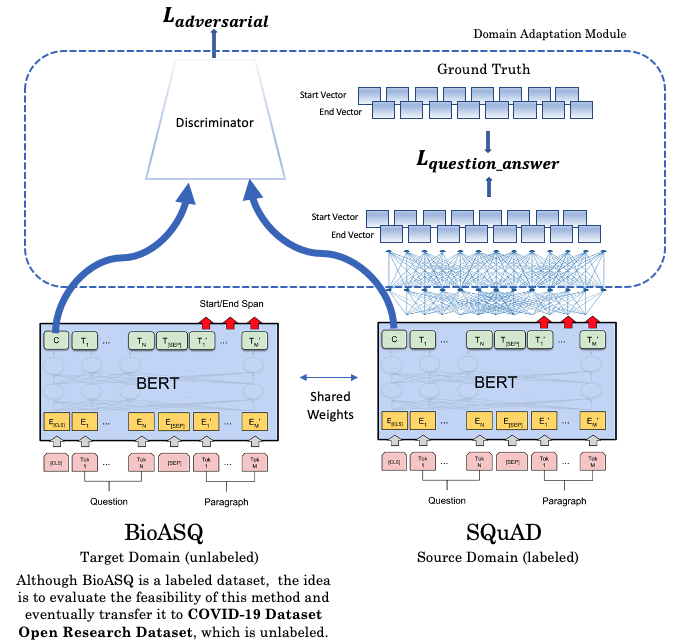

# Domain Adaptation and Transfer for Question-Aswering Task

I am an utter NLP enthusiast and have been actively utilizing NLP methods to solve problems. Recently, I have worked on a Vision related problem of Image Segmentation while managing a domain adpatation and transfer. I was successful with in domain transfer with vision, with a significant gain in accuracy and mIoU, now I wonder if I could implement the same model for NLP.

I hope you will appreciate my effort of drawing the diagram above to illustrate the idea :P

# Background

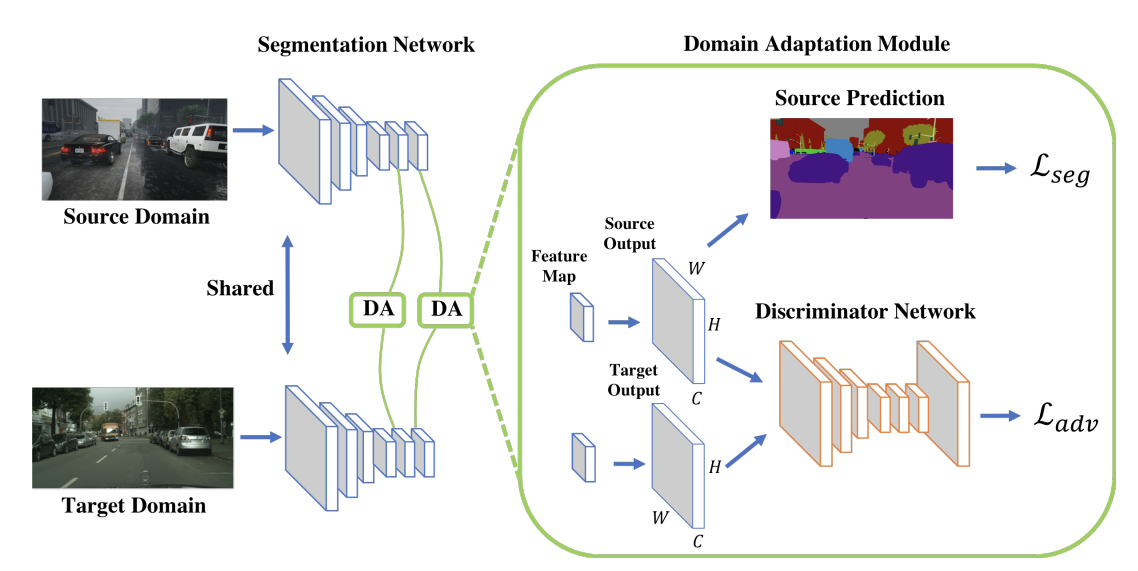


Unlike the diagram above, this diagram is copied and pasted from the original paper. This [paper](https://arxiv.org/pdf/1802.10349.pdf) is titled Learning to Adapt Structured Output Space for Semantic Segmentation, which is the source of inspiration. I have implemented a variant of such architecture for Image Segmentation using DeepLabV3 Plus as the segmentation network. The reason for doing this is very simple. We almost always lack data from our target domain, but it is possible to get a general purpose dataset somewhere as the source domain. In this case, GTA-V (game simulated images) is the source domain, and Cityscapes (real life images) are trained end-to-end together. The only difference is that, we only used the labels from GTA-V dataset, while the data from Cityscapes are treated as unlabeled, and used only in the calculation of adversarial loss. No labeled data is used.

Here I explore the use of the same architecture, ported over to NLP. Instead of a DeepLabV3PLus model for segmentation, I used BERT for Qnestion-Answering. I am aware that there are better models such as ALBERT but it is easier to iterate with just a BERT. It is trained with SQuAD version 1.0 together with BioASQ, treating BioASQ as a unlabeled dataset. This is so that we can test on the BioASQ dataset, and have an idea of the gain in the metrics being used. The same network can be used to train the COVID-19 Open Research Dataset (unlabeled) with SQuAD (labeled) eventually. 

# Getting to Me:

# Accompanying blogpost:
# https://medium.com/@munkarkin/domain-adaptation-for-nlp-and-vision-with-deep-learning-2cfb748f0051


# LinkedIn
# https://www.linkedin.com/in/karkinmun/

I have trained 3 different models under this scheme, 1 baseline model, and 2 different models with adversarial under with different loss function for the discriminator. The discriminator is just a very simple network of a couple of fully-connected layers. 

* Baseline Model (Trained with only SQuAD Version 1) and tested on BioASQ.

* Adversarial Model (Trained with SQuAD (labeled), and BioASQ (unlabeled)). Tested on the same test set. 

The gain in performance for NLP is not as significant as the vision task. 

Question-Answering Performance

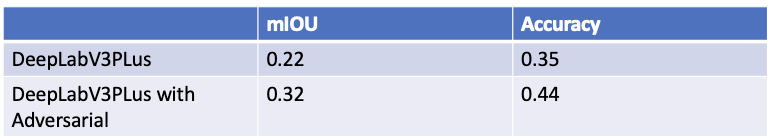

Image Segmentation Performance

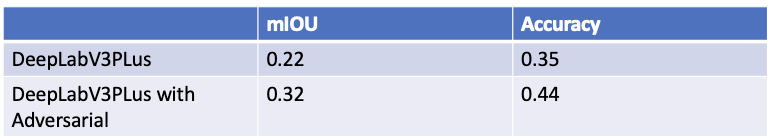

To give you an idea of how useful this idea of domain adaptation is, allow me to show you some of the test results. Recall that the kind of data we are dealing with are not from the same domain, i.e. the training set with labels are from games and we would like to transfer the domain from the games to real-life.  

A sample result is as follow.

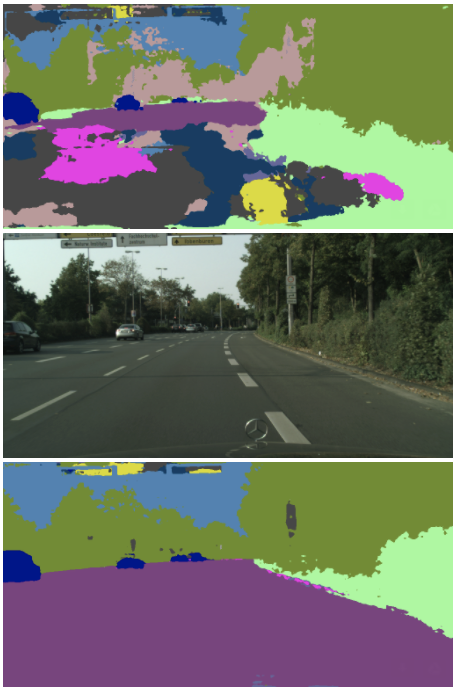

What about our NLP model? :) Here's a sample output from the adversarial model. 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>question</th>
      <th>answer_adversarial</th>
      <th>answer_no_adversarial</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Is the virus transmitted by aerisol, droplets, food, close contact, fecal matter, or water</td>
      <td>empty The outbreak of pneumonia caused by the novel coronavirus 2019-nCoV in Wuhan, Hubei province of China, at the end of 2019 shaped tremendous challenges to China's public health and clinical treatment. According to current observations, 2019-nCoV is weaker than SARS in pathogenesis, but has stronger transmission competence; it's mechanism of cross-species spread might be related with angiotensin-converting enzyme Ⅱ (ACE2), which is consistent with the receptor SARS-CoV. After the outbreak of this disease, Chinese scientists invested a lot of energy to carry out research by developing rapid diagnostic reagents, identifying the characters of the pathogen, screening out clinical drugs that may inhibit the virus, and are rapidly developing vaccines. Contacts were people with exposure to a patient with COVID-19 on or after the patient's symptom onset date. One week later, she was hospitalised with pneumonia and tested positive for SARS-CoV-2. Despite active symptom monitoring and testing of symptomatic and some asymptomatic contacts, no further transmission was detected.</td>
      <td>Lack of evidence on SARS-CoV-2 transmission dynamics has led to shifting isolation guidelines between airborne and droplet isolation precautions. According to current observations, 2019-nCoV is weaker than SARS in pathogenesis, but has stronger transmission competence; it's mechanism of cross-species spread might be related with angiotensin-converting enzyme Ⅱ (ACE2), which is consistent with the receptor SARS-CoV. After the outbreak of this disease, Chinese scientists invested a lot of energy to carry out research by developing rapid diagnostic reagents, identifying the characters of the pathogen, screening out clinical drugs that may inhibit the virus, and are rapidly developing vaccines. Contacts were people with exposure to a patient with COVID-19 on or after the patient's symptom onset date. Findings Patient 1-a woman in her 60s-returned from China in mid-January, 2020. One week later, she was hospitalised with pneumonia and tested positive for SARS-CoV-2. Despite active symptom monitoring and testing of symptomatic and some asymptomatic contacts, no further transmission was detected.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>How long is the incubation period for the virus</td>
      <td>Wuhan pneumonia is an acute infectious disease caused by the 2019 novel coronavirus for Hubei province. We also employed manifold learning and related statistical analysis to decipher the incubation relationships between different age/gender groups. author/funder, who has granted medRxiv a license to display the preprint in perpetuity. The incubation period of COVID-19 did not follow general incubation distributions such as lognormal, Weibull, and Gamma distributions. Background Three clusters of coronavirus disease 2019 (COVID-19) linked to a tour group from China, a company conference, and a church were identified in Singapore in February, 2020. Our results show that the incubation period falls within the range of 2-14 days with 95% confidence and has a mean of around 5 days when approximated using the best-fit lognormal distribution.</td>
      <td>Wuhan pneumonia is an acute infectious disease caused by the 2019 novel coronavirus for Hubei province. author/funder, who has granted medRxiv a license to display the preprint in perpetuity. incubation of COVID-19 along with previous statistical analysis. Enhanced surveillance and contact tracing is essential to minimise the risk of widespread transmission in the community. With an estimation of 8 days incubation period and 6 days 17 serial interval, our results indicate that there may exist infectiousness during the 18 incubation period for 2019-nCoV. This increases the difficulty of screening or \n\n The geographic spread of 2019 novel coronavirus infections from the epicenter of Wuhan, China, has provided an opportunity to study the natural history of the recently emerged virus. Our results show that the incubation period falls within the range of 2-14 days with 95% confidence and has a mean of around 5 days when approximated using the best-fit lognormal distribution.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Can the virus be transmitted asymptomatically or during the incubation period</td>
      <td>An ongoing outbreak of pneumonia associated with 2019 novel coronavirus (2019-nCoV) was reported in China. The epidemiological evidence has shown a potential transmission of the 2019-nCoV during the incubation period. We used a stochastic transmission model in which every person generates novel infections according to a probability distribution that is affected by the incubation period distribution (time from infection to symptoms), distribution of the latent period (time from infection to a person becoming infectious), and overall transmissibility. Timeliness as well as completeness of tracing and diagnosis of cases are paramount to achieve containment and effective slowing down of the epidemic growth rate. We evaluated the potential of transmission during the incubation period in 50 infection clusters, including 124 cases.</td>
      <td>An ongoing outbreak of pneumonia associated with 2019 novel coronavirus (2019-nCoV) was reported in China. The epidemiological evidence has shown a potential transmission of the 2019-nCoV during the incubation period. Further isolation recommendation and continuous nucleic acid tests may also be recommended to the patients discharged. author/funder, who has granted medRxiv a license to display the preprint in perpetuity. The ongoing outbreak of novel corona virus disease 2019 in Wuhan, China, is arousing international concern. We evaluated the potential of transmission during the incubation period in 50 infection clusters, including 124 cases. With an estimation of 8 days incubation period and 6 days 17 serial interval, our results indicate that there may exist infectiousness during the 18 incubation period for 2019-nCoV. This increases the difficulty of screening or</td>
    </tr>
    <tr>
      <th>3</th>
      <td>How does weather, heat, and humidity affect the tramsmission of 2019-nCoV</td>
      <td>As new cases of COVID--19 are being confirmed worldwide pressure is mounting to increase understanding of the factors underlying the spread the disease. Using data on local transmissions until the 23rd of March 2020, we develop an ensemble of 200 ecological niche models to project monthly variation in climate suitability for spread of SARS--CoV--2 throughout a typical climatological year. There is an international push to contain the virus and prevent its spread. Using data obtained from similar coronaviruses, e.g. severe acute respiratory syndrome (SARS) and Middle East respiratory syndrome (MERS), experts are confident that 70% ethanol and 0.1% sodium hypochlorite should inactivate the virus. MAIN OUTCOME MEASURES Data on COVID-19 incidence and climate between Jan 20 and Feb 29, 2020. COVID-19 incidence changed with temperature as daily incidence decreased when the temperature rose. No significant association between COVID-19 incidence and absolute humidity was observed in distributed lag nonlinear models. M-SEIR models help to better evaluate environmental and social impacts on COVID-19.</td>
      <td>As new cases of COVID--19 are being confirmed worldwide pressure is mounting to increase understanding of the factors underlying the spread the disease. Using data on local transmissions until the 23rd of March 2020, we develop an ensemble of 200 ecological niche models to project monthly variation in climate suitability for spread of SARS--CoV--2 throughout a typical climatological year. There is an international push to contain the virus and prevent its spread. Using data obtained from similar coronaviruses, e.g. severe acute respiratory syndrome (SARS) and Middle East respiratory syndrome (MERS), experts are confident that 70% ethanol and 0.1% sodium hypochlorite should inactivate the virus. MAIN OUTCOME MEASURES Data on COVID-19 incidence and climate between Jan 20 and Feb 29, 2020. COVID-19 incidence changed with temperature as daily incidence decreased when the temperature rose. No significant association between COVID-19 incidence and absolute humidity was observed in distributed lag nonlinear models. M-SEIR models help to better evaluate environmental and social impacts on COVID-19.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>How long can the 2019-nCoV virus remain viable on common surfaces</td>
      <td>Coronavirus disease 2019 is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), it was first identified in 2019 in Wuhan, China and has resulted in the 2019-20 coronavirus pandemic. In this study, a close surrogate of human norovirus causing gastrointestinal disease in mice, murine norovirus type 1 (MNV-1), retained infectivity for more than 2 weeks following contact with a range of surface materials, including Teflon (polytetrafluoroethylene [PTFE]), polyvinyl chloride (PVC), ceramic tiles, glass, silicone rubber, and stainless steel. Persistence was slightly prolonged on ceramic surfaces. 2019-nCoV which was identified is a kind of beta coronavirus belongs to one of four coronavirus genera. 1 To explore potential intermediate host of a novel coronavirus is vital to rapidly control 2 continuous COVID-19 spread. We found genomic and evolutionary evidences of the 3 occurrence of 2019-nCoV-like coronavirus (named as Pangolin-CoV) from dead Malayan 4 Pangolins. The S1 protein of Pangolin-CoV is much more 7 closely related to 2019-nCoV than RaTG13. It indicates Pangolin-CoV has 10 similar pathogenic potential to 2019-nCoV, and would be helpful to trace the origin and 11 probable intermediate host of 2019-nCoV. \n\n 2019 novel coronavirus (2019-nCoV) is one of the beta coronaviruses and was identified as the pathogen of the severe "coronavirus disease 2019 (COVID-19)" in 2019. Currently, the national defending actions on the 2019-nCoV in China is in a critical period. In order to clarify the imaging features of COVID-19 and reduce the infection risk of medical personnel in radiology departments, we summarized the experience on radiological examinations and infection prevention for COVID-19, aiming to guide virus prevention, diagnosis and control within radiology departments.</td>
      <td>Coronavirus disease 2019 is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), it was first identified in 2019 in Wuhan, China and has resulted in the 2019-20 coronavirus pandemic. In this study, a close surrogate of human norovirus causing gastrointestinal disease in mice, murine norovirus type 1 (MNV-1), retained infectivity for more than 2 weeks following contact with a range of surface materials, including Teflon (polytetrafluoroethylene [PTFE]), polyvinyl chloride (PVC), ceramic tiles, glass, silicone rubber, and stainless steel. Persistence was slightly prolonged on ceramic surfaces. 2019-nCoV which was identified is a kind of beta coronavirus belongs to one of four coronavirus genera. 1 To explore potential intermediate host of a novel coronavirus is vital to rapidly control 2 continuous COVID-19 spread. We found genomic and evolutionary evidences of the 3 occurrence of 2019-nCoV-like coronavirus (named as Pangolin-CoV) from dead Malayan 4 Pangolins. The S1 protein of Pangolin-CoV is much more 7 closely related to 2019-nCoV than RaTG13. It indicates Pangolin-CoV has 10 similar pathogenic potential to 2019-nCoV, and would be helpful to trace the origin and 11 probable intermediate host of 2019-nCoV. \n\n 2019 novel coronavirus (2019-nCoV) is one of the beta coronaviruses and was identified as the pathogen of the severe "coronavirus disease 2019 (COVID-19)" in 2019. Currently, the national defending actions on the 2019-nCoV in China is in a critical period. In order to clarify the imaging features of COVID-19 and reduce the infection risk of medical personnel in radiology departments, we summarized the experience on radiological examinations and infection prevention for COVID-19, aiming to guide virus prevention, diagnosis and control within radiology departments.</td>
    </tr>
    <tr>
      <th>5</th>
      <td>What risk factors contribute to the severity of 2019-nCoV</td>
      <td>empty In current severe global emergency situation of 2019-nCov outbreak, it is imperative to identify vulnerable and susceptible groups for effective protection and care. Also, we found higher ACE2 gene expression in Asian current smokers compared to non-smokers but not in Caucasian current smokers, which may indicate an existence of gene-smoking interaction. In bronchial epithelium, ACE2 is actively expressed in goblet cells of current smokers and club cells of non-smokers. Thus, smoking history may provide valuable information in identifying susceptible population and standardizing treatment regimen. Moreover, the consensus describes the grading and classification of OVCF patients diagnosed with COVID-19 according to the severity of illness and recommends different treatment plans and corresponding protective measures based on the different types and epidemic prevention and control requirements. About 100 children were affected, with the youngest being 30 h after birth.</td>
      <td>Hsueh P-R, Asymptomatic carrier state, acute respiratory disease, and pneumonia due to severe acute respiratory syndrome coronavirus 2 (SARSCoV-2): Facts and myths, Journal of Microbiology, Immunology and Infection, https://doi. Also, we found higher ACE2 gene expression in Asian current smokers compared to non-smokers but not in Caucasian current smokers, which may indicate an existence of gene-smoking interaction. In bronchial epithelium, ACE2 is actively expressed in goblet cells of current smokers and club cells of non-smokers. Thus, smoking history may provide valuable information in identifying susceptible population and standardizing treatment regimen. Moreover, the consensus describes the grading and classification of OVCF patients diagnosed with COVID-19 according to the severity of illness and recommends different treatment plans and corresponding protective measures based on the different types and epidemic prevention and control requirements. About 100 children were affected, with the youngest being 30 h after birth.</td>
    </tr>
    <tr>
      <th>6</th>
      <td>How does hypertension affect patients</td>
      <td>BACKGROUND: Studies have reminded that cardiovascular metabolic comorbidities made patients more susceptible to suffer 2019 novel corona virus (2019-nCoV) disease (COVID-19), and exacerbated the infection. The aim of this analysis is to determine the association of cardiovascular metabolic diseases with the development of COVID-19. RESULTS: A total of six studies with 1527 patients were included in this analysis. Here, we analyzed over 700 lung transcriptome samples of patients with comorbidities associated with severe COVID-19 and found that ACE2 was highly expressed in these patients, compared to control individuals. Correlation and network analyses revealed many potential regulators of ACE2 in the human lung, including genes related to histone modifications, such as HAT1, HDAC2, and KDM5B. In fact, epigenetic marks found in ACE2 locus were compatible to with those promoted by KDM5B. Our systems biology approach offers a possible explanation for increase of COVID-19 severity in patients with certain comorbidities.</td>
      <td>BACKGROUND: Studies have reminded that cardiovascular metabolic comorbidities made patients more susceptible to suffer 2019 novel corona virus (2019-nCoV) disease (COVID-19), and exacerbated the infection. The aim of this analysis is to determine the association of cardiovascular metabolic diseases with the development of COVID-19. RESULTS: A total of six studies with 1527 patients were included in this analysis. Here, we analyzed over 700 lung transcriptome samples of patients with comorbidities associated with severe COVID-19 and found that ACE2 was highly expressed in these patients, compared to control individuals. Correlation and network analyses revealed many potential regulators of ACE2 in the human lung, including genes related to histone modifications, such as HAT1, HDAC2, and KDM5B. In fact, epigenetic marks found in ACE2 locus were compatible to with those promoted by KDM5B. Our systems biology approach offers a possible explanation for increase of COVID-19 severity in patients with certain comorbidities.</td>
    </tr>
    <tr>
      <th>7</th>
      <td>How does heart disease affect patients</td>
      <td>BACKGROUND: Studies have reminded that cardiovascular metabolic comorbidities made patients more susceptible to suffer 2019 novel corona virus (2019-nCoV) disease (COVID-19), and exacerbated the infection. The incidences of hypertension, cardia-cerebrovascular diseases and diabetes were about twofolds, threefolds and twofolds, respectively, higher in ICU/severe cases than in their non-ICU/severe counterparts.</td>
      <td>BACKGROUND: Studies have reminded that cardiovascular metabolic comorbidities made patients more susceptible to suffer 2019 novel corona virus (2019-nCoV) disease (COVID-19), and exacerbated the infection. The incidences of hypertension, cardia-cerebrovascular diseases and diabetes were about twofolds, threefolds and twofolds, respectively, higher in ICU/severe cases than in their non-ICU/severe counterparts.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>How does copd affect patients</td>
      <td>Currently, coronavirus disease 2019 (COVID-19) was of clustering onset in China and challenging to the Chinese healthcare system. Based on these considerations, the COPD Group of the Chinese Thoracic Society (CTS) and the COPD working Committee of the Chinese Association of Chest Physicians (CACP) altogether drafted the instruction for medical management and prevention of COPD during the COVID-19 epidemic period for the healthcare practitioner and patients. Introduction: In the beginning of 2020, an unexpected outbreak due to a new corona virus made the headlines all over the world. Methods: A comprehensive systematic search was performed on PubMed, Scopus, Web of science, and Google scholar, to find articles published until 15 February 2020.</td>
      <td>Currently, coronavirus disease 2019 (COVID-19) was of clustering onset in China and challenging to the Chinese healthcare system. Based on these considerations, the COPD Group of the Chinese Thoracic Society (CTS) and the COPD working Committee of the Chinese Association of Chest Physicians (CACP) altogether drafted the instruction for medical management and prevention of COPD during the COVID-19 epidemic period for the healthcare practitioner and patients. Introduction: In the beginning of 2020, an unexpected outbreak due to a new corona virus made the headlines all over the world. Methods: A comprehensive systematic search was performed on PubMed, Scopus, Web of science, and Google scholar, to find articles published until 15 February 2020.</td>
    </tr>
    <tr>
      <th>9</th>
      <td>How does smoking affect patients</td>
      <td>In current severe global emergency situation of 2019-nCov outbreak, it is imperative to identify vulnerable and susceptible groups for effective protection and care. In bronchial epithelium, ACE2 is actively expressed in goblet cells of current smokers and club cells of non-smokers. Here, we show that cigarette smoke causes a dose-dependent upregulation of Angiotensin Converting Enzyme 2 (ACE2), the SARS-CoV-2 receptor, in rodent and human lungs. Introduction: In the beginning of 2020, an unexpected outbreak due to a new corona virus made the headlines all over the world. Methods: A comprehensive systematic search was performed on PubMed, Scopus, Web of science, and Google scholar, to find articles published until 15 February 2020.</td>
      <td>In current severe global emergency situation of 2019-nCov outbreak, it is imperative to identify vulnerable and susceptible groups for effective protection and care. In bronchial epithelium, ACE2 is actively expressed in goblet cells of current smokers and club cells of non-smokers. Here, we show that cigarette smoke causes a dose-dependent upregulation of Angiotensin Converting Enzyme 2 (ACE2), the SARS-CoV-2 receptor, in rodent and human lungs. Introduction: In the beginning of 2020, an unexpected outbreak due to a new corona virus made the headlines all over the world. Methods: A comprehensive systematic search was performed on PubMed, Scopus, Web of science, and Google scholar, to find articles published until 15 February 2020.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>How does pregnancy affect patients</td>
      <td>empty Background In December, 2019, coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) emerged in Wuhan, China. The clinical characteristics of these patients with COVID-19 during pregnancy were similar to those of non-pregnant adults with COVID-19 that have been reported in the literature. Breastmilk samples were also collected and tested from patients after the first lactation. None of the patients developed severe COVID-19 pneumonia or died, as of Feb 4, 2020. Findings from this small group of cases suggest that there is currently no evidence for intrauterine infection caused by vertical transmission in women who develop COVID-19 pneumonia in late pregnancy.</td>
      <td>Introduction: The outbreak of the new Coronavirus in China in December 2019 and subsequently in various countries around the world has raised concerns about the possibility of vertical transmission of the virus from mother to fetus. The clinical characteristics of these patients with COVID-19 during pregnancy were similar to those of non-pregnant adults with COVID-19 that have been reported in the literature. Breastmilk samples were also collected and tested from patients after the first lactation. None of the patients developed severe COVID-19 pneumonia or died, as of Feb 4, 2020. Findings from this small group of cases suggest that there is currently no evidence for intrauterine infection caused by vertical transmission in women who develop COVID-19 pneumonia in late pregnancy.</td>
    </tr>
    <tr>
      <th>11</th>
      <td>What is the fatality rate of 2019-nCoV</td>
      <td>There is a new public health crises threatening the world with the emergence and spread of 2019 novel coronavirus (2019-nCoV) \n\n Abstract Background: In December 2019, a novel coronavirus (SARS-CoV-2) infected pneumonia (COVID-19) occurred in Wuhan, China. It is necessary to seek specimen types with higher detection efficiency and accuracy. Based on these results, we argued that the current COVID-19 epidemic has a substantial potential for causing a pandemic. The proposed approach provides insights in early risk assessment using publicly available data. author/funder, who has granted medRxiv a license to display the preprint in perpetuity.</td>
      <td>There is a new public health crises threatening the world with the emergence and spread of 2019 novel coronavirus (2019-nCoV) \n\n Abstract Background: In December 2019, a novel coronavirus (SARS-CoV-2) infected pneumonia (COVID-19) occurred in Wuhan, China. BACKGROUND: An ongoing outbreak of pneumonia caused by a novel coronavirus [severe acute respiratory syndrome coronavirus (SARS-CoV)-2], named COVID-19, hit a major city of China, Wuhan in December 2019 and subsequently spread to other provinces/regions of China and overseas. METHODS: In this study, we used a purely data-driven statistical method to estimate the CFR in the early phase of the COVID-19 outbreak. The proposed approach provides insights in early risk assessment using publicly available data. author/funder, who has granted medRxiv a license to display the preprint in perpetuity.</td>
    </tr>
    <tr>
      <th>12</th>
      <td>What public health policies prevent or control the spread of 2019-nCoV</td>
      <td>The pneumonia caused by the novel coronavirus (2019-nCoV), which began in December 2019, has become the most serious public health problem, threatening people's health and life. Furthermore, special attention should be given to the safety of the medical staff, strengthening their infection monitoring and outbreak management.</td>
      <td>The pneumonia caused by the novel coronavirus (2019-nCoV), which began in December 2019, has become the most serious public health problem, threatening people's health and life. These measures are proposed to provide a guidance for the prevention and control of 2019-nCoV nosocomial infection in the pediatric outpatient and ward. Given that the maternal-fetus vertical transmission caused by 2019-nCoV is still unidentified, as a special population, neonates need a targeted clinical management.</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Can animals transmit 2019-nCoV</td>
      <td>The present outbreak of a coronavirus-associated acute respiratory disease called coronavirus disease 19 (COVID-19) is the third documented spillover of an animal coronavirus to humans in only two decades that has resulted in a major epidemic. This will improve our understanding of virus-host interactions in an ever-changing environment and enhance our preparedness for future outbreaks. The molecular and phylogenetic analyses showed that pangolin Coronaviruses (pangolin-CoV) are genetically related to both the 2019-nCoV and bat Coronaviruses but do not support the 2019-nCoV arose directly from the pangolin-CoV. Our study also suggested that pangolin be natural host of Betacoronavirus, with a potential to infect humans. 2019-nCoV which was identified is a kind of beta coronavirus belongs to one of four coronavirus genera. Additionally, our findings suggest that snake is the most probable wildlife animal reservoir for the 2019-nCoV based on its RSCU bias resembling snake compared to other animals. The ongoing outbreak of viral pneumonia in China and beyond is associated with a novel 28 coronavirus, provisionally termed 2019-nCoV. This outbreak has been tentatively associated 29 with a seafood market in Wuhan, China, where the sale of wild animals may be the source of 30 zoonotic infection.</td>
      <td>The present outbreak of a coronavirus-associated acute respiratory disease called coronavirus disease 19 (COVID-19) is the third documented spillover of an animal coronavirus to humans in only two decades that has resulted in a major epidemic. Based on phylogeny, taxonomy and established practice, the CSG recognizes this virus as forming a sister clade to the prototype human and bat severe acute respiratory syndrome corona- \n\nsignificance. Coronaviruses are the well-known cause of severe respiratory, enteric and systemic infections in a wide range of hosts including man, mammals, fish, and avian. 2019-nCoV which was identified is a kind of beta coronavirus belongs to one of four coronavirus genera. 2019-nCoV uses the same cell entry receptor, angiotensin-converting enzyme 2 (ACE2), as SARS-CoV. And dipeptidyl peptidase 4 (DPP4) or CD26 is the cell receptor for MERS-CoV. The expression of ACE2 was found to have obvious positive expression in human corneal and conjunctival epithelium, and corneal endothelium. To determine the possible virus reservoir, we have carried out comprehensive sequence analysis and comparison in conjunction with relative synonymous codon usage (RSCU) bias among different animal species based on existing sequences of the newly identified coronavirus 2019-nCoV. Results obtained from our analyses suggest that the 2019-nCoV appears to be a recombinant virus between the bat coronavirus and an origin-unknown coronavirus. Additionally, our findings suggest that snake is the most probable wildlife animal reservoir for the 2019-nCoV based on its RSCU bias resembling snake compared to other animals.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>What animal did 2019-nCoV come from</td>
      <td>The current outbreak of viral pneumonia in the city of Wuhan, China, was caused by a novel coronavirus designated 2019-nCoV by the World Health Organization, as determined by sequencing the viral RNA genome. To determine the possible virus reservoir, we have carried out comprehensive sequence analysis and comparison in conjunction with relative synonymous codon usage (RSCU) bias among different animal species based on existing sequences of the newly identified coronavirus 2019-nCoV. Results obtained from our analyses suggest that the 2019-nCoV appears to be a recombinant virus between the bat coronavirus and an origin-unknown coronavirus. Additionally, our findings suggest that snake is the most probable wildlife animal reservoir for the 2019-nCoV based on its RSCU bias resembling snake compared to other animals. Taken together, our results suggest that homologous recombination within the spike glycoprotein may contribute to cross-species transmission from snake to humans. Based on phylogeny, taxonomy and established practice, the CSG recognizes this virus as forming a sister clade to the prototype human and bat severe acute respiratory syndrome corona- \n\nsignificance.</td>
      <td>The current outbreak of viral pneumonia in the city of Wuhan, China, was caused by a novel coronavirus designated 2019-nCoV by the World Health Organization, as determined by sequencing the viral RNA genome. To determine the possible virus reservoir, we have carried out comprehensive sequence analysis and comparison in conjunction with relative synonymous codon usage (RSCU) bias among different animal species based on existing sequences of the newly identified coronavirus 2019-nCoV. Results obtained from our analyses suggest that the 2019-nCoV appears to be a recombinant virus between the bat coronavirus and an origin-unknown coronavirus. Additionally, our findings suggest that snake is the most probable wildlife animal reservoir for the 2019-nCoV based on its RSCU bias resembling snake compared to other animals. This will improve our understanding of virus-host interactions in an ever-changing environment and enhance our preparedness for future outbreaks. 2019-nCoV which was identified is a kind of beta coronavirus belongs to one of four coronavirus genera.</td>
    </tr>
    <tr>
      <th>15</th>
      <td>What real-time genomic tracking tools exist</td>
      <td>In December 2019, a new virus (initially called ‘Novel Coronavirus 2019-nCoV’ and later renamed to SARS-CoV-2) causing severe acute respiratory syndrome (coronavirus disease COVID-19) emerged in Wuhan, Hubei Province, China, and rapidly spread to other parts of China and other countries around the world, despite China’s massive efforts to contain the disease within Hubei. Genome Detective is a web-based, user-friendly software application to quickly and accurately assemble all known virus genomes from next generation sequencing datasets. This application allows the identification of phylogenetic clusters and genotypes from assembled genomes in FASTA format. The tool can accept up to 2,000 sequences per submission and the analysis of a new whole genome sequence will take approximately one minute. The tool also allows tracking of new viral mutations as the outbreak expands globally, which may help to accelerate the development of novel diagnostics, drugs and vaccines to stop the COVID-19 disease. The tool has been tested and validated with hundreds of whole genomes from ten coronavirus species, and correctly classified all of the SARS-related coronavirus (SARSr-CoV) and all of the available public data for 2019-nCoV. The tool also allows tracking of new viral mutations as the outbreak expands globally, which may help to accelerate the development of novel diagnostics, drugs and vaccines. It is necessary to seek specimen types with higher detection efficiency and accuracy. Results: The positive rates of 2019-nCoV from sputum specimens and throat swabs were 76.9% and 44.2%, respectively. Sputum specimens showed a significantly higher positive rate than throat swabs in detecting viral nucleic acid using qRT-PCR assay (P=0.001). Fifteen genomes from Wuhan were grouped by mutation sites and others were identified by Wuhan's or specific mutation sites. The severe cases present with pneumonia, which can progress to acute respiratory distress syndrome. The browser is home to 16 complete 2019-nCoV genome sequences, together with hundreds of related viral sequences including severe acute respiratory syndrome coronavirus (SARS-CoV), Middle East respiratory syndrome coronavirus (MERS-CoV), and Ebola virus. The WashU Virus Genome Browser inherited many features and track types from the WashU Epigenome Browser, and additionally incorporated a new type of SNV track to address the specific needs of viral research.</td>
      <td>In December 2019, a new virus (initially called ‘Novel Coronavirus 2019-nCoV’ and later renamed to SARS-CoV-2) causing severe acute respiratory syndrome (coronavirus disease COVID-19) emerged in Wuhan, Hubei Province, China, and rapidly spread to other parts of China and other countries around the world, despite China’s massive efforts to contain the disease within Hubei. Genome Detective is a web-based, user-friendly software application to quickly and accurately assemble all known virus genomes from next generation sequencing datasets. This application allows the identification of phylogenetic clusters and genotypes from assembled genomes in FASTA format. The tool can accept up to 2,000 sequences per submission and the analysis of a new whole genome sequence will take approximately one minute. The tool also allows tracking of new viral mutations as the outbreak expands globally, which may help to accelerate the development of novel diagnostics, drugs and vaccines to stop the COVID-19 disease. The tool has been tested and validated with hundreds of whole genomes from ten coronavirus species, and correctly classified all of the SARS-related coronavirus (SARSr-CoV) and all of the available public data for 2019-nCoV. The tool also allows tracking of new viral mutations as the outbreak expands globally, which may help to accelerate the development of novel diagnostics, drugs and vaccines. It is necessary to seek specimen types with higher detection efficiency and accuracy. Results: The positive rates of 2019-nCoV from sputum specimens and throat swabs were 76.9% and 44.2%, respectively. Sputum specimens showed a significantly higher positive rate than throat swabs in detecting viral nucleic acid using qRT-PCR assay (P=0.001). Fifteen genomes from Wuhan were grouped by mutation sites and others were identified by Wuhan's or specific mutation sites. The severe cases present with pneumonia, which can progress to acute respiratory distress syndrome. The browser is home to 16 complete 2019-nCoV genome sequences, together with hundreds of related viral sequences including severe acute respiratory syndrome coronavirus (SARS-CoV), Middle East respiratory syndrome coronavirus (MERS-CoV), and Ebola virus. The WashU Virus Genome Browser inherited many features and track types from the WashU Epigenome Browser, and additionally incorporated a new type of SNV track to address the specific needs of viral research.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>What geographic variations are there in the genome of 2019-nCoV</td>
      <td>As of early March, 2019-nCoV has infected more than one hundred thousand people and claimed thousands of lives. These epitopes can be used to develop more effective vaccines and identify neutralizing antibodies. Based on these findings, the spike protein is likely immunogenic and a potential vaccine candidate. Fifteen genomes from Wuhan were grouped by mutation sites and others were identified by Wuhan's or specific mutation sites. The genome sequence similarities among 29 strains from China (Hangzhou, Wuhan, and Shenzhen), Japan, USA, and Finland, were all more than 99.9%; however, some single nucleotide polymorphisms were identified in some strains. The 2019 novel coronavirus (2019-nCoV or SARS-CoV-2) has spread more rapidly than any other betacoronavirus including SARS-CoV and MERS-CoV. \n\nHowever, the mechanisms responsible for infection and molecular evolution of this virus remained unclear. 10 Results: Systematic analysis of 120 genomic sequences of 2019-nCoV revealed cocirculation of two genetic subgroups with distinct SNPs markers, which can be used to trace the 2019-nCoV spreading pathways to different regions and countries. Although 2019-nCoV, human and bat SARS-CoV share high homologous in overall genome structures, they evolved into two distinct groups with different receptor entry specificities 15 \n\nthrough potential recombination in the receptor binding regions. Understanding the evolution, zoonotic transmission, and source of this novel virus would help accelerating containment and prevention efforts. Our findings emphasize the requirement for continuous surveillance of CoV strains in live animal markets to better understand the viral adaptation to human host and to develop practical solutions to prevent the emergence of novel pathogenic CoV strains. Five key amino-acid residues involved in the 8 interaction with human ACE2 are completely consistent between Pangolin-CoV and 2019-9 nCoV but four amino-acid mutations occur in RaTG13.</td>
      <td>As of early March, 2019-nCoV has infected more than one hundred thousand people and claimed thousands of lives. These epitopes can be used to develop more effective vaccines and identify neutralizing antibodies. Based on these findings, the spike protein is likely immunogenic and a potential vaccine candidate. Fifteen genomes from Wuhan were grouped by mutation sites and others were identified by Wuhan's or specific mutation sites. The genome sequence similarities among 29 strains from China (Hangzhou, Wuhan, and Shenzhen), Japan, USA, and Finland, were all more than 99.9%; however, some single nucleotide polymorphisms were identified in some strains. The 2019 novel coronavirus (2019-nCoV or SARS-CoV-2) has spread more rapidly than any other betacoronavirus including SARS-CoV and MERS-CoV. \n\nHowever, the mechanisms responsible for infection and molecular evolution of this virus remained unclear. 10 Results: Systematic analysis of 120 genomic sequences of 2019-nCoV revealed cocirculation of two genetic subgroups with distinct SNPs markers, which can be used to trace the 2019-nCoV spreading pathways to different regions and countries. Although 2019-nCoV, human and bat SARS-CoV share high homologous in overall genome structures, they evolved into two distinct groups with different receptor entry specificities 15 \n\nthrough potential recombination in the receptor binding regions. Understanding the evolution, zoonotic transmission, and source of this novel virus would help accelerating containment and prevention efforts. Our findings emphasize the requirement for continuous surveillance of CoV strains in live animal markets to better understand the viral adaptation to human host and to develop practical solutions to prevent the emergence of novel pathogenic CoV strains. Five key amino-acid residues involved in the 8 interaction with human ACE2 are completely consistent between Pangolin-CoV and 2019-9 nCoV but four amino-acid mutations occur in RaTG13.</td>
    </tr>
    <tr>
      <th>17</th>
      <td>What effors are being done in asia to prevent further outbreaks</td>
      <td>Word Count: 1,561 (Including References) \n\nThe world is currently suffering \n\n Highlights  the latest summary of the COVID-19 outbreak in China;  there might be an oral-fecal transmission of the virus;  aggregates and consolidates the epidemiology, clinical manifestations, diagnosis, treatments and preventions of this new type of coronavirus. At this stage, preparedness, transparency, and sharing of information are crucial to risk assessments and beginning outbreak control activities. This information should include reports from outbreak site and from laboratories supporting the investigation.</td>
      <td>Word Count: 1,561 (Including References) \n\nThe world is currently suffering \n\n Highlights  the latest summary of the COVID-19 outbreak in China;  there might be an oral-fecal transmission of the virus;  aggregates and consolidates the epidemiology, clinical manifestations, diagnosis, treatments and preventions of this new type of coronavirus. At this stage, preparedness, transparency, and sharing of information are crucial to risk assessments and beginning outbreak control activities. This information should include reports from outbreak site and from laboratories supporting the investigation.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>What drugs or therapies are being investigated</td>
      <td>Recently, a novel coronavirus (2019-nCoV), officially known as severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), emerged in China. Despite drastic containment measures, the spread of this virus is ongoing. The efforts of international health authorities have since focused on rapid diagnosis and isolation of patients as well as the search for therapies able to counter the most severe effects of the disease. In the absence of a known efficient therapy and because of the situation of a public-health emergency, it made sense to investigate the possible effect of chloroquine/hydroxychloroquine against SARS-CoV-2 since this molecule was previously described as a potent inhibitor of most coronaviruses, including SARS-CoV-1. The broad-spectrum viral protease inhibitor Kaletra&amp;lt;sup&amp;gt;&amp;reg;&amp;lt;/sup&amp;gt; is also recommended in the current NCP clinical practice. Using bioinformatics and database analysis, we have identified 75 clinically compounds, including 20 marketed compounds, that are efficacious in inhibiting key targets in virus- and host-based approaches, which may facilitate the development of new therapeutic options for 2019-nCoV. &amp;lt;/p&amp;gt; \n\n Rapid diagnostics, vaccines and therapeutics are important interventions for the management of the 2019 novel coronavirus (2019-nCoV) outbreak. The likely earliest Phase 1 vaccine trial is a synthetic DNA-based candidate. A number of novel compounds as well as therapeutics licensed for other conditions appear to have in vitro efficacy against the 2019-nCoV. Some are being tested in clinical trials against MERS-CoV and SARS-CoV, while others have been listed for clinical trials against 2019-nCoV. However, there are currently no effective specific antivirals or drug combinations supported by high-level evidence. Variation information in 125,748 exomes were collected for racial differences analyses. But the efficacy and safety of these drugs for 2019-nCoV pneumonia patients need to be assessed by further clinical trials.</td>
      <td>Recently, a novel coronavirus (2019-nCoV), officially known as severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), emerged in China. Despite drastic containment measures, the spread of this virus is ongoing. The efforts of international health authorities have since focused on rapid diagnosis and isolation of patients as well as the search for therapies able to counter the most severe effects of the disease. In the absence of a known efficient therapy and because of the situation of a public-health emergency, it made sense to investigate the possible effect of chloroquine/hydroxychloroquine against SARS-CoV-2 since this molecule was previously described as a potent inhibitor of most coronaviruses, including SARS-CoV-1. The broad-spectrum viral protease inhibitor Kaletra&amp;lt;sup&amp;gt;&amp;reg;&amp;lt;/sup&amp;gt; is also recommended in the current NCP clinical practice. Using bioinformatics and database analysis, we have identified 75 clinically compounds, including 20 marketed compounds, that are efficacious in inhibiting key targets in virus- and host-based approaches, which may facilitate the development of new therapeutic options for 2019-nCoV. &amp;lt;/p&amp;gt; \n\n Rapid diagnostics, vaccines and therapeutics are important interventions for the management of the 2019 novel coronavirus (2019-nCoV) outbreak. The likely earliest Phase 1 vaccine trial is a synthetic DNA-based candidate. A number of novel compounds as well as therapeutics licensed for other conditions appear to have in vitro efficacy against the 2019-nCoV. Some are being tested in clinical trials against MERS-CoV and SARS-CoV, while others have been listed for clinical trials against 2019-nCoV. However, there are currently no effective specific antivirals or drug combinations supported by high-level evidence. Variation information in 125,748 exomes were collected for racial differences analyses. But the efficacy and safety of these drugs for 2019-nCoV pneumonia patients need to be assessed by further clinical trials.</td>
    </tr>
    <tr>
      <th>19</th>
      <td>Are anti-inflammatory drugs recommended</td>
      <td>Currently, Severe Acute Respiratory Syndrome Coronavirus 2 (SARS-CoV-2, formerly known as 2019-nCoV, the causative pathogen of Coronavirus Disease 2019 (COVID-19)) has rapidly spread across China and around the world, causing an outbreak of acute infectious pneumonia. No specific anti-virus drugs or vaccines are available for the treatment of this sudden and lethal disease. Recent studies 6 revealed that the genome sequence of SARS-CoV-2 is very similar to that of SARS-CoV. 7 \n\nTherefore, herein, we analysed the 3CL pro sequence, constructed its 3D homology model, and 8 screened it against a medicinal plant library containing 32,297 potential anti-viral 9 phytochemicals/traditional Chinese medicinal compounds.</td>
      <td>Currently, Severe Acute Respiratory Syndrome Coronavirus 2 (SARS-CoV-2, formerly known as 2019-nCoV, the causative pathogen of Coronavirus Disease 2019 (COVID-19)) has rapidly spread across China and around the world, causing an outbreak of acute infectious pneumonia. No specific anti-virus drugs or vaccines are available for the treatment of this sudden and lethal disease. Recent studies 6 revealed that the genome sequence of SARS-CoV-2 is very similar to that of SARS-CoV. 7 \n\nTherefore, herein, we analysed the 3CL pro sequence, constructed its 3D homology model, and 8 screened it against a medicinal plant library containing 32,297 potential anti-viral 9 phytochemicals/traditional Chinese medicinal compounds.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>Which non-pharmaceutical interventions limit tramsission</td>
      <td>Human infections with a novel coronavirus (SARS-CoV-2) were first identified via syndromic surveillance in December of 2019 in Wuhan China. Our analysis and forecasting estimates a total of 54,100 SARS-CoV-2 infections (80 % CI 5,600 to 125,300) have occurred in the United States to March 12, 2020. 2009 H1N1 Non-pharmaceutical intervention Model of goal-directed behavior Travel intention a b s t r a c t Theoretically, in the tourism context this study introduced a new concept of non-pharmaceutical intervention (NPI) for influenza, and tested the impact of NPI on the behavioral intention of potential international tourists. Further uncertainty comes from a lack of knowledge of the potential effects of removing interventions once the epidemic is declining. (which was not peer-reviewed) The copyright holder for this preprint . Healthcare workers and elderly people had higher attack rates and severity risk increased with age. The effective reproductive number dropped from 3.86 (95% credible interval 3.74 to 3.97) before interventions to 0.32 (0.28 to 0.37) post interventions.</td>
      <td>Human infections with a novel coronavirus (SARS-CoV-2) were first identified via syndromic surveillance in December of 2019 in Wuhan China. Data from a recent national conference, the Conservative Political Action Conference, (CPAC) near Washington, DC and from the outbreak in Wuhan, China were used to fit a simple exponential growth model to estimate the total number of incident SARS-CoV-2 infections in the United States on March 1, 2020, and to forecast subsequent infections potentially undetected by current testing strategies. Further uncertainty comes from a lack of knowledge of the potential effects of removing interventions once the epidemic is declining. We show strong improvements in outcomes if governments review NPI more frequently whereas, in comparison, the stability of compliance has surprisingly small effects on cumulative mortality. CC-BY-NC-ND 4.0 International license It is made available under a is the author/funder, who has granted medRxiv a license to display the preprint in perpetuity. We developed a susceptible-exposed-infectious-recovered model to study the epidemic and evaluate the impact of interventions. The effective reproductive number dropped from 3.86 (95% credible interval 3.74 to 3.97) before interventions to 0.32 (0.28 to 0.37) post interventions. is the (which was not peer-reviewed) The copyright holder for this preprint . An investigation was conducted to describe the outbreak, evaluate effectiveness of non-pharmaceutical interventions and assess surge capacity of health agencies.</td>
    </tr>
    <tr>
      <th>21</th>
      <td>What are most important barriers to compliance</td>
      <td>Much of the uncertainty about the progression of the COVID-19 pandemic stems from questions about when and how non-pharmaceutical interventions (NPI) by governments, in particular social distancing measures, are implemented, to what extent the population complies with these measures, and how compliance changes through time. Further uncertainty comes from a lack of knowledge of the potential effects of removing interventions once the epidemic is declining. (which was not peer-reviewed) The copyright holder for this preprint . Data from a recent national conference, the Conservative Political Action Conference, (CPAC) near Washington, DC and from the outbreak in Wuhan, China were used to fit a simple exponential growth model to estimate the total number of incident SARS-CoV-2 infections in the United States on March 1, 2020, and to forecast subsequent infections potentially undetected by current testing strategies. In the absence of a known efficient therapy and because of the situation of a public-health emergency, it made sense to investigate the possible effect of chloroquine/hydroxychloroquine against SARS-CoV-2 since this molecule was previously described as a potent inhibitor of most coronaviruses, including SARS-CoV-1.</td>
      <td>Much of the uncertainty about the progression of the COVID-19 pandemic stems from questions about when and how non-pharmaceutical interventions (NPI) by governments, in particular social distancing measures, are implemented, to what extent the population complies with these measures, and how compliance changes through time. Further uncertainty comes from a lack of knowledge of the potential effects of removing interventions once the epidemic is declining. By combining an epidemiological model of COVID-19 for the United Kingdom with simple sub-models for these societal processes, this study aims to shed light on the conceivable trajectories that the pandemic might follow over the next 1.5 years. (which was not peer-reviewed) The copyright holder for this preprint . Data from a recent national conference, the Conservative Political Action Conference, (CPAC) near Washington, DC and from the outbreak in Wuhan, China were used to fit a simple exponential growth model to estimate the total number of incident SARS-CoV-2 infections in the United States on March 1, 2020, and to forecast subsequent infections potentially undetected by current testing strategies.</td>
    </tr>
    <tr>
      <th>22</th>
      <td>How does extracorporeal membrane oxygenation affect 2019-nCoV patients</td>
      <td>Introduction: Transport of patients undergoing extracorporeal membrane oxygenation is currently available in 5 referral centers in our country. Methods: Retrospective case series of patients managed by our mobile extracorporeal membrane oxygenation team and transferred to San Gerardo University Hospital from December 2004 to December 2012. 14 patients were females (33%) and 28 males (67%). The average transport distance was 121.69 km (±183.08) with a range between 9 km and 1044 Km. In 28 patients (97%) a veno-venous bypass was utilized, while in one case (3%) a Veno-Arterial cannulation was performed. No major clinical or technical issues were observed during the transport. We developed a simplified ECMO transport system without mechanical ventilation for use by public emergency medical services.</td>
      <td>Introduction: Transport of patients undergoing extracorporeal membrane oxygenation is currently available in 5 referral centers in our country. The average transport distance was 121.69 km (±183.08) with a range between 9 km and 1044 Km. 29 patients (69%) were transported with extracorporeal membrane oxygenation support, while 13 patients (31%) were transported with conventional ventilation. No major clinical or technical issues were observed during the transport. This report highlights the severity of late-onset complications of catheter placements and shows the potential of ECMO treatment for the management of acute illnesses with bridge to recovery. We developed a simplified ECMO transport system without mechanical ventilation for use by public emergency medical services. Based on the clinical data of novel coronavirus pneumonia (NCP), as well as the dada from previous clinical studies and the recommendations from the Extracorporeal Life Support Organization (ELSO), the committee board of the Chinese Society of Extracorporeal Life Support (CSECLS) made this recommendations to guide clinical ECMO application in the patients with NCP.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>What telemedicine and cybercare methods are most effective</td>
      <td>In this paper, we propose to advance and transform today's healthcare system using a model of networked health care called Cybercare. The Cybercare model shifts health care provision from hospital to home; from specialist to generalist; and from treatment to prevention. Individuals with disabilities also face the same obstacles for their out-of-home medical visits. Using the latest sensor technologies, a person's vital data can be collected in a smart home environment. Recovery process can be charted on a regular basis. Medical practitioners can therefore provide the necessary healthrelated services to more people. In the absence of a known efficient therapy and because of the situation of a public-health emergency, it made sense to investigate the possible effect of chloroquine/hydroxychloroquine against SARS-CoV-2 since this molecule was previously described as a potent inhibitor of most coronaviruses, including SARS-CoV-1. Some of these dashboards and applications are receiving data updates in near-real-time (at the time of writing), and one of them is meant for individual users (in China) to check if the app user has had any close contact with a person confirmed or suspected to have been infected with SARS-CoV-2 in the recent past.</td>
      <td>In this paper, we propose to advance and transform today's healthcare system using a model of networked health care called Cybercare. The Cybercare model shifts health care provision from hospital to home; from specialist to generalist; and from treatment to prevention. Individuals with disabilities also face the same obstacles for their out-of-home medical visits. Using the latest sensor technologies, a person's vital data can be collected in a smart home environment. Recovery process can be charted on a regular basis. Medical practitioners can therefore provide the necessary healthrelated services to more people. In the absence of a known efficient therapy and because of the situation of a public-health emergency, it made sense to investigate the possible effect of chloroquine/hydroxychloroquine against SARS-CoV-2 since this molecule was previously described as a potent inhibitor of most coronaviruses, including SARS-CoV-1. Some of these dashboards and applications are receiving data updates in near-real-time (at the time of writing), and one of them is meant for individual users (in China) to check if the app user has had any close contact with a person confirmed or suspected to have been infected with SARS-CoV-2 in the recent past.</td>
    </tr>
    <tr>
      <th>24</th>
      <td>How is artificial intelligence being used in real time health delivery</td>
      <td>Two independent groups last week reported that they had used artificial intelligence in different ways to find possible treatments for the novel coronavirus, named 2019-nCoV. On Feb. 4, researchers from the AI drug discovery company BenevolentAI and Imperial College London reported that they had used AI software to find an already-approved drug that might limit the virus’s ability to infect people (Lancet 2020, DOI: 10.1016/S0140-6736(20)30304-4). The Cybercare model shifts health care provision from hospital to home; from specialist to generalist; and from treatment to prevention. Cybercare uses seven "pillars" of technology to provide medical care: genomics; telemedicine; robotics; simulation, including virtual and augmented reality; artificial intelligence (AI), including intelligent agents; the electronic medical record (EMR); and smartphones. These authors contributed equally to this work. Here, we present our experience in building and deploying an AI system that automatically analyzes CT images to detect COVID-19 pneumonia features. In the wake of COVID-19 disease, caused by the SARS-CoV-2 virus, we designed and developed a predictive model based on Artificial Intelligence (AI) and Machine Learning algorithms to determine the health risk and predict the mortality risk of patients with COVID-19. In this study, the most alarming symptoms and features were also identified. Based on our study, undertaking epidemiological investigations and genomic data surveillance could positively impact public health in terms of guiding prevention efforts to reduce 2019-nCOV transmission in real time.</td>
      <td>Two independent groups last week reported that they had used artificial intelligence in different ways to find possible treatments for the novel coronavirus, named 2019-nCoV. On Feb. 4, researchers from the AI drug discovery company BenevolentAI and Imperial College London reported that they had used AI software to find an already-approved drug that might limit the virus’s ability to infect people (Lancet 2020, DOI: 10.1016/S0140-6736(20)30304-4). The Cybercare model shifts health care provision from hospital to home; from specialist to generalist; and from treatment to prevention. Cybercare uses seven "pillars" of technology to provide medical care: genomics; telemedicine; robotics; simulation, including virtual and augmented reality; artificial intelligence (AI), including intelligent agents; the electronic medical record (EMR); and smartphones. These authors contributed equally to this work. Here, we present our experience in building and deploying an AI system that automatically analyzes CT images to detect COVID-19 pneumonia features. In the wake of COVID-19 disease, caused by the SARS-CoV-2 virus, we designed and developed a predictive model based on Artificial Intelligence (AI) and Machine Learning algorithms to determine the health risk and predict the mortality risk of patients with COVID-19. In this study, the most alarming symptoms and features were also identified. Based on our study, undertaking epidemiological investigations and genomic data surveillance could positively impact public health in terms of guiding prevention efforts to reduce 2019-nCOV transmission in real time.</td>
    </tr>
    <tr>
      <th>25</th>
      <td>What adjunctive or supportive methods can help patients</td>
      <td>With the expanding use of molecular assays, viral pathogens are increasingly recognized among critically ill adult patients with community-acquired severe respiratory illness; studies have detected respiratory viral infections (RVIs) in 17-53% of such patients. Non-invasive ventilation in patients with severe RVI causing acute hypoxemic respiratory failure and pneumonia is associated with a high likelihood of transition to invasive ventilation. Limited existing knowledge highlights the need for data regarding supportive care and adjunctive pharmacologic therapy that is specific for critically ill patients with severe RVI. There is a need for more pragmatic and efficient designs to test different therapeutics both individually and in combination. The supportive care and non-specific treatment to ameliorate the symptoms of the patient are the only options currently. Some of these dashboards and applications are receiving data updates in near-real-time (at the time of writing), and one of them is meant for individual users (in China) to check if the app user has had any close contact with a person confirmed or suspected to have been infected with SARS-CoV-2 in the recent past.</td>
      <td>With the expanding use of molecular assays, viral pathogens are increasingly recognized among critically ill adult patients with community-acquired severe respiratory illness; studies have detected respiratory viral infections (RVIs) in 17-53% of such patients. Non-invasive ventilation in patients with severe RVI causing acute hypoxemic respiratory failure and pneumonia is associated with a high likelihood of transition to invasive ventilation. Limited existing knowledge highlights the need for data regarding supportive care and adjunctive pharmacologic therapy that is specific for critically ill patients with severe RVI. There is a need for more pragmatic and efficient designs to test different therapeutics both individually and in combination. The supportive care and non-specific treatment to ameliorate the symptoms of the patient are the only options currently. Some of these dashboards and applications are receiving data updates in near-real-time (at the time of writing), and one of them is meant for individual users (in China) to check if the app user has had any close contact with a person confirmed or suspected to have been infected with SARS-CoV-2 in the recent past.</td>
    </tr>
    <tr>
      <th>26</th>
      <td>What diagnostic tests (tools) exist or are being developed to detect 2019-nCoV</td>
      <td>Abstract Background: In December 2019, a novel coronavirus (SARS-CoV-2) infected pneumonia (COVID-19) occurred in Wuhan, China. It is necessary to seek specimen types with higher detection efficiency and accuracy. Here we use computational tools from structural biology and machine learning to identify 2019-nCoV T-cell and B-cell epitopes based on viral protein antigen presentation and antibody binding properties. These epitopes can be used to develop more effective vaccines and identify neutralizing antibodies. No mutations are present near the spike protein receptor binding domain. Despite drastic containment measures, the spread of this virus is ongoing. In the absence of a known efficient therapy and because of the situation of a public-health emergency, it made sense to investigate the possible effect of chloroquine/hydroxychloroquine against SARS-CoV-2 since this molecule was previously described as a potent inhibitor of most coronaviruses, including SARS-CoV-1. Preliminary trials of chloroquine repurposing in the treatment of COVID-19 in China have been encouraging, leading to several new trials. We used the Immune Epitope Database and Analysis Resource (IEDB) resource to catalog available data related to other coronaviruses, including SARS-CoV, which has high sequence similarity to 2019-nCoV, and is the best-characterized coronavirus in terms of epitope responses. However, serological assays as well as point-of-care testing kits have not been developed but are likely in the near future. The likely earliest Phase 1 vaccine trial is a synthetic DNA-based candidate.</td>
      <td>Abstract Background: In December 2019, a novel coronavirus (SARS-CoV-2) infected pneumonia (COVID-19) occurred in Wuhan, China. It is necessary to seek specimen types with higher detection efficiency and accuracy. Conclusions: The detection rates of 2019-nCoV from sputum specimens are significantly higher than throat swabs. Genome Detective is a web-based, user-friendly software application to quickly and accurately assemble all known virus genomes from next generation sequencing datasets. The tool has been tested and validated with hundreds of whole genomes from ten coronavirus species, and correctly classified all of the SARS-related coronavirus (SARSr-CoV) and all of the available public data for 2019-nCoV. The tool also allows tracking of new viral mutations as the outbreak expands globally, which may help to accelerate the development of novel diagnostics, drugs and vaccines. Here we use computational tools from structural biology and machine learning to identify 2019-nCoV T-cell and B-cell epitopes based on viral protein antigen presentation and antibody binding properties. Despite drastic containment measures, the spread of this virus is ongoing. In the absence of a known efficient therapy and because of the situation of a public-health emergency, it made sense to investigate the possible effect of chloroquine/hydroxychloroquine against SARS-CoV-2 since this molecule was previously described as a potent inhibitor of most coronaviruses, including SARS-CoV-1. Preliminary trials of chloroquine repurposing in the treatment of COVID-19 in China have been encouraging, leading to several new trials. Parallel bionformatic predictions identified a priori potential B and T cell epitopes for 2019-nCoV. The independent identification of the same regions using two approaches reflects the high probability that these regions are targets for immune recognition of 2019-nCoV. \n\nWe identified potential targets for immune responses to 2019-nCoV and provide essential information for understanding human immune responses to this virus and evaluation of diagnostic and vaccine candidates. However, serological assays as well as point-of-care testing kits have not been developed but are likely in the near future. The likely earliest Phase 1 vaccine trial is a synthetic DNA-based candidate.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>What collaborations are happening within the research community</td>
      <td>empty Emerging infectious diseases are an important public health threat and infections with pandemic potential are a major global risk. Collaboration between countries should be encouraged in a way that acknowledges the benefi ts that derive from sharing biological material and establishing equitable collaborative research partnerships. C-ME stores the information in industry-standard databases that are immediately accessible by appropriate permission within the computer network directory service or anonymously across the internet through the C-ME application or through a web browser.</td>
      <td>Partnerships between developed and developing country institutions are increasingly becoming important in addressing contemporary global health challenges faced by health systems. Inter-university health collaboration such as the Nottingham Trent University (UK) and Makerere University School of Public Health (Uganda) partnership provide opportunities for working together in training, research and service delivery while strengthening health systems. The experiences and prospects of this growing partnership can inform other collaborations in similar settings. The one-health approach provides a means to develop this and could potentially enhance alignment of global health and trade priorities. These annotations provide additional information about the atomic structure or image data that can then be evaluated, amended or added to by other project members.</td>
    </tr>
    <tr>
      <th>28</th>
      <td>What is the immune system response to 2019-nCoV</td>
      <td>Effective countermeasures against the recent emergence and rapid expansion of the 2019-Novel Coronavirus (2019-nCoV) require the development of data and tools to understand and monitor viral spread and immune responses. We used the Immune Epitope Database and Analysis Resource (IEDB) resource to catalog available data related to other coronaviruses, including SARS-CoV, which has high sequence similarity to 2019-nCoV, and is the best-characterized coronavirus in terms of epitope responses. Here we use computational tools from structural biology and machine learning to identify 2019-nCoV T-cell and B-cell epitopes based on viral protein antigen presentation and antibody binding properties. These epitopes can be used to develop more effective vaccines and identify neutralizing antibodies. Based on these findings, the spike protein is likely immunogenic and a potential vaccine candidate.</td>
      <td>Effective countermeasures against the recent emergence and rapid expansion of the 2019-Novel Coronavirus (2019-nCoV) require the development of data and tools to understand and monitor viral spread and immune responses. Here we use computational tools from structural biology and machine learning to identify 2019-nCoV T-cell and B-cell epitopes based on viral protein antigen presentation and antibody binding properties. These epitopes can be used to develop more effective vaccines and identify neutralizing antibodies. Based on these findings, the spike protein is likely immunogenic and a potential vaccine candidate. Angiotensin-converting enzyme 2 (ACE2) is the receptor for SARS-CoV and has been suggested to be also the receptor for 2019-nCoV. Paradoxically, ACE2 \n\n 2019-novel coronavirus (2019-nCoV) is a highly pathogenic human CoV that first emerged in Wuhan in 2019.2019-nCoV has a zoonotic origin and poses a major threat to public health.</td>
    </tr>
    <tr>
      <th>29</th>
      <td>Can personal protective equipment prevent the transmission of 2019-nCoV</td>
      <td>UK employers have a legal obligation under the Health and Safety at Work Act 1974 to protect staff from harm. And the Control of Substances Hazardous to Health Regulations place a duty to carry out individual risk assessments to identify hazards, quantify risks, and put suitable controls in place, says Steven Nimmo, editor of the Occupational Medicine Journal . “ But the above legal obligations still apply. Methods Since the COVID-19 was included in the Class B infectious diseases and was managed according to Class A infectious diseases in China, 127 patients who underwent ophthalmic surgery were enrolled at First Affiliated Hospital of Army Military Medical University from January 21 to February 19,2020. Results One hundred and twenty-seven patients underwent ophthalmic surgeries, including emergency surgery, daytime surgery and other surgeries for sight-threatening diseases. According to the national epidemic prevention and control requirements, epidemic screening for these patients and infectious managing measures were performed during the perioperative period, including the sterilization of relevant environment and equipments, the personal medical prevention and protection for medical staffs and patients, which made surealltheoperationswent smoothlyand safely.</td>
      <td>UK employers have a legal obligation under the Health and Safety at Work Act 1974 to protect staff from harm. And the Control of Substances Hazardous to Health Regulations place a duty to carry out individual risk assessments to identify hazards, quantify risks, and put suitable controls in place, says Steven Nimmo, editor of the Occupational Medicine Journal . “ But the above legal obligations still apply. Methods Since the COVID-19 was included in the Class B infectious diseases and was managed according to Class A infectious diseases in China, 127 patients who underwent ophthalmic surgery were enrolled at First Affiliated Hospital of Army Military Medical University from January 21 to February 19,2020. Results One hundred and twenty-seven patients underwent ophthalmic surgeries, including emergency surgery, daytime surgery and other surgeries for sight-threatening diseases. According to the national epidemic prevention and control requirements, epidemic screening for these patients and infectious managing measures were performed during the perioperative period, including the sterilization of relevant environment and equipments, the personal medical prevention and protection for medical staffs and patients, which made surealltheoperationswent smoothlyand safely.</td>
    </tr>
    <tr>
      <th>30</th>
      <td>Can 2019-nCoV infect patients a second time</td>
      <td>Abstract Background: In December 2019, a novel coronavirus (SARS-CoV-2) infected pneumonia (COVID-19) occurred in Wuhan, China. Conclusions: The detection rates of 2019-nCoV from sputum specimens are significantly higher than throat swabs. The results can facilitate the selection of specimens and increase the accuracy of diagnosis. By press time, more than 70,000 infected people had been confirmed worldwide. Reaction time varied from 15-40 minutes, depending on the loading of virus in the collected samples. Some of these dashboards and applications are receiving data updates in near-real-time (at the time of writing), and one of them is meant for individual users (in China) to check if the app user has had any close contact with a person confirmed or suspected to have been infected with SARS-CoV-2 in the recent past.</td>
      <td>Abstract Background: In December 2019, a novel coronavirus (SARS-CoV-2) infected pneumonia (COVID-19) occurred in Wuhan, China. Diagnostic test based on real-time reverse transcription polymerase chain reaction assay (qRT-PCR) was the main means of confirmation, and sample collection was mostly throat swabs, which was easy to miss the diagnosis. It is necessary to seek specimen types with higher detection efficiency and accuracy. The results can facilitate the selection of specimens and increase the accuracy of diagnosis. Reaction time varied from 15-40 minutes, depending on the loading of virus in the collected samples. Severe acute respiratory syndrome (SARS-CoV-2) due to novel Coronavirus \n\n In December 2019, a new virus (initially called ‘Novel Coronavirus 2019-nCoV’ and later renamed to SARS-CoV-2) causing severe acute respiratory syndrome (coronavirus disease COVID-19) emerged in Wuhan, Hubei Province, China, and rapidly spread to other parts of China and other countries around the world, despite China’s massive efforts to contain the disease within Hubei.</td>
    </tr>
  </tbody>
</table>



# Data Processing

Code References

https://github.com/theamrzaki/COVID-19-BERT-ResearchPapers-Semantic-Search/blob/master/COVID_19_BERT_ResearchPapers_Semantic_Search.ipynb
https://colab.research.google.com/github/spark-ming/albert-qa-demo/blob/master/Question_Answering_with_ALBERT.ipynb
https://github.com/gsarti/covid-papers-browser
https://www.kaggle.com/dirktheeng/anserini-bert-squad-for-semantic-corpus-search



In [ ]:
import os

import glob
import json
import pandas as pd
from tqdm.notebook import tqdm

PROCESS_DATA = False


if PROCESS_DATA:

    root_path = '/kaggle/input/CORD-19-research-challenge'
    all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)

    metadata_path = f'{root_path}/metadata.csv'
    meta_df = pd.read_csv(metadata_path, dtype={
        'pubmed_id': str,
        'Microsoft Academic Paper ID': str, 
        'doi': str
    })


    class FileReader:
        def __init__(self, file_path):
            with open(file_path) as file:
                content = json.load(file)
                self.paper_id = content.get('paper_id')#['paper_id']
                self.abstract = []
                self.body_text = []
                # Abstract
                for entry in ([] if not content.get('abstract') else content.get('abstract')):#['abstract']:
                    self.abstract.append(entry['text'])
                # Body text
                for entry in ([] if not content.get('body_text') else content.get('body_text')):#['body_text']:
                    self.body_text.append(entry.get('text'))#['text'])
                self.abstract = '\n'.join(self.abstract)
                self.body_text = '\n'.join(self.body_text)
        def __repr__(self):
            return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
    first_row = FileReader(all_json[0])

    def get_breaks(content, length):
        data = ""
        words = content.split(' ')
        total_chars = 0

        # add break every length characters
        for i in range(len(words)):
            total_chars += len(words[i])
            if total_chars > length:
                data = data + "<br>" + words[i]
                total_chars = 0
            else:
                data = data + " " + words[i]
        return data

    dict_ = {'paper_id': [], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
    for idx, entry in tqdm(enumerate(all_json)):
        if idx % (len(all_json) // 10) == 0:
            print(f'Processing index: {idx} of {len(all_json)}')
        content = FileReader(entry)

        # get metadata information
        meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
        # no metadata, skip this paper
        if len(meta_data) == 0:
            continue

        dict_['paper_id'].append(content.paper_id)
        dict_['abstract'].append(content.abstract)
        dict_['body_text'].append(content.body_text)

        # also create a column for the summary of abstract to be used in a plot
        if len(content.abstract) == 0: 
            # no abstract provided
            dict_['abstract_summary'].append("Not provided.")
        elif len(content.abstract.split(' ')) > 100:
            # abstract provided is too long for plot, take first 300 words append with ...
            info = content.abstract.split(' ')[:100]
            summary = get_breaks(' '.join(info), 40)
            dict_['abstract_summary'].append(summary + "...")
        else:
            # abstract is short enough
            summary = get_breaks(content.abstract, 40)
            dict_['abstract_summary'].append(summary)

        # get metadata information
        meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]

        try:
            # if more than one author
            authors = meta_data['authors'].values[0].split(';')
            if len(authors) > 2:
                # more than 2 authors, may be problem when plotting, so take first 2 append with ...
                dict_['authors'].append(". ".join(authors[:2]) + "...")
            else:
                # authors will fit in plot
                dict_['authors'].append(". ".join(authors))
        except Exception as e:
            # if only one author - or Null valie
            dict_['authors'].append(meta_data['authors'].values[0])

        # add the title information, add breaks when needed
        try:
            title = get_breaks(meta_data['title'].values[0], 40)
            dict_['title'].append(title)
        # if title was not provided
        except Exception as e:
            dict_['title'].append(meta_data['title'].values[0])

        # add the journal information
        dict_['journal'].append(meta_data['journal'].values[0])


    df_covid = pd.DataFrame(dict_, columns=['paper_id', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
    df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)
    df_covid = df_covid.replace('', None)
    df_covid.to_csv("df_covid.csv", index = False)



## Setup Model

In [ ]:
SETUP_MODEL = False

if SETUP_MODEL:

    !git clone https://github.com/gsarti/covid-papers-browser.git
    !cd covid-papers-browser && pip install -r requirements.txt && python -m spacy download en_core_web_sm && python -m nltk.downloader punkt
    !cd covid-papers-browser && python scripts/download_model.py --model covidbert-nli


In [ ]:
CREATE_INDEX = False

if CREATE_INDEX:
    
    !pip install faiss-cpu --quiet

    import pickle

    with open('/kaggle/input/embedding-covidbert-nli/embeddings.pkl', 'rb') as f:
        embedding = pickle.load(f)

    import pandas as pd
    all_df = pd.read_csv('/kaggle/input/text2id/text2id.csv', index_col=0)
    
    #all_df = all_df.drop_duplicates(subset=['paper_id']).drop_duplicates(subset=['text']) # if want only abstract 
    all_df['question_mark'] = all_df['text'].apply(lambda x: "?" in x)

    all_df = all_df[all_df['question_mark']==False].drop_duplicates(subset=['text'])
    
    embedding = [embedding[idx] for idx in all_df.index.tolist()] # # if want only abstract 

    import faiss
    import numpy as np

    dim_vec = 768
    
    all_df = all_df.reset_index().drop(['index'], axis=1)

    index = faiss.index_factory(dim_vec, "IDMap, Flat")
    index.add_with_ids(np.array(embedding), np.array(all_df.index.tolist()))
    faiss.write_index(index, 'covidBERT_index.index')

In [ ]:
PRODUCE_EMBEDDINGS = False
if PRODUCE_EMBEDDINGS:

    
    from sentence_transformers import SentenceTransformer

    DATA_PATH = 'data'
    MODELS_PATH = 'covid-papers-browser/models'
    MODEL_NAME = 'covidbert-nli'
    CORPUS_PATH = os.path.join(DATA_PATH, 'corpus.pkl')
    MODEL_PATH = os.path.join(MODELS_PATH, MODEL_NAME)
    EMBEDDINGS_PATH = os.path.join(DATA_PATH, f'{MODEL_NAME}-embeddings.pkl')
    model = SentenceTransformer(MODEL_PATH)


    dfs = []
    embeddings = []

    m = df_covid.shape[0]
    for i in tqdm(range(0, m)):

        _id = df_covid['paper_id'].iloc[i]
        lst = [v for v in [df_covid['abstract'].iloc[i]] + df_covid['body_text'].iloc[i].split("\n") if str(v)!= 'nan']

        query_embeds = model.encode(lst, show_progress_bar=False)

        embeddings += query_embeds

        tmp = pd.DataFrame(lst, columns = ['text'])
        tmp['paper_id'] = _id

        dfs.append(tmp)

    pd.concat(dfs).reset_index().drop(['index'],axis=1).to_csv("text2id.csv")

    import pickle

    with open('embeddings.pkl', 'wb') as f:
        pickle.dump(embeddings,f)


In [ ]:
!git clone https://github.com/munkarkin96/mrqa --quiet
!pip install json_lines --quiet

from mrqa.iterator import read_squad_examples, convert_examples_to_features, write_predictions
from mrqa.iterator import SquadExample
from pytorch_pretrained_bert import BertTokenizer
import collections 
#from mrqa.iterator import read_squad_examples, convert_examples_to_features, write_predictions
#from mrqa.iterator import SquadExample
#from mrqa.iterator import write_predictions

from pytorch_pretrained_bert import BertTokenizer
import collections 
from pytorch_pretrained_bert.tokenization import BertTokenizer, BasicTokenizer


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                                       do_lower_case=True)


questions = [
    
    'How long is the incubation period for the virus',
    'Can the virus be transmitted asymptomatically or during the incubation period',
    'How long can 2019-nCoV remain viable on inanimate, environmental, or common surfaces',
]


passages = [
    
    'to avoid the risk of virus spread, all potentially exposed subjects are required to be isolated for 14 days , which is the longest predicted incubation time.',
    'the virus is transmitted through droplets, close contact, and other means, and patients in the incubation period could potentially transmit the virus to other persons.',
    'the analysis of 22 studies reveals that human coronaviruses such as severe acute respiratory syndrome (sars) coronavirus, middle east respiratory syndrome (mers) coronavirus or endemic human coronaviruses (hcov) can persist on inanimate surfaces like metal, glass or plastic for up to 9 days , but can be efficiently inactivated by surface disinfection procedures with 62-71 % ethanol, 0.'
]

    
def _get_best_indexes(logits, n_best_size):
    """Get the n-best logits from a list."""
    index_and_score = sorted(enumerate(logits), key=lambda x: x[1], reverse=True)

    best_indexes = []
    for i in range(len(index_and_score)):
        if i >= n_best_size:
            break
        best_indexes.append(index_and_score[i][0])
    return best_indexes

   

import numpy as np

def get_mappings_features(passage, question):

    max_seq_length = 384
    max_query_length= 64
    doc_stride=128
    
    doc_tokens = nltk.word_tokenize(passage)
        
    query_tokens = tokenizer.tokenize(question)

    if len(query_tokens) > max_query_length:
        query_tokens = query_tokens[0:max_query_length]

    tok_to_orig_index = []
    orig_to_tok_index = []
    all_doc_tokens = []
    for (i, token) in enumerate(doc_tokens):
        orig_to_tok_index.append(len(all_doc_tokens))
        sub_tokens = tokenizer.tokenize(token)
        for sub_token in sub_tokens:
            tok_to_orig_index.append(i)
            all_doc_tokens.append(sub_token)


    # The -3 accounts for [CLS], [SEP] and [SEP]
    max_tokens_for_doc = max_seq_length - len(query_tokens) - 3

    # We can have documents that are longer than the maximum sequence length.
    # To deal with this we do a sliding window approach, where we take chunks
    # of the up to our max length with a stride of `doc_stride`.
    _DocSpan = collections.namedtuple(  # pylint: disable=invalid-name
        "DocSpan", ["start", "length"])
    doc_spans = []
    start_offset = 0
    while start_offset < len(all_doc_tokens):
        length = len(all_doc_tokens) - start_offset
        if length > max_tokens_for_doc:
            length = max_tokens_for_doc
        doc_spans.append(_DocSpan(start=start_offset, length=length))
        if start_offset + length == len(all_doc_tokens):
            break
        start_offset += min(length, doc_stride)

    for (doc_span_index, doc_span) in enumerate(doc_spans):
        tokens = []
        token_to_orig_map = {}
        token_is_max_context = {}
        segment_ids = []
        tokens.append("[CLS]")
        segment_ids.append(0)
        for token in query_tokens:
            tokens.append(token)
            segment_ids.append(0)
        tokens.append("[SEP]")
        segment_ids.append(0)

        for i in range(doc_span.length):
            split_token_index = doc_span.start + i
            token_to_orig_map[len(tokens)] = tok_to_orig_index[split_token_index]

            is_max_context = _check_is_max_context(doc_spans, doc_span_index,
                                                   split_token_index)
            token_is_max_context[len(tokens)] = is_max_context
            tokens.append(all_doc_tokens[split_token_index])
            segment_ids.append(1)
        tokens.append("[SEP]")
        segment_ids.append(1)

        input_ids = tokenizer.convert_tokens_to_ids(tokens)

        # The mask has 1 for real tokens and 0 for padding tokens. Only real
        # tokens are attended to.
        input_mask = [1] * len(input_ids)

        # Zero-pad up to the sequence length.
        while len(input_ids) < max_seq_length:
            input_ids.append(0)
            input_mask.append(0)
            segment_ids.append(0)

        # convert to numpy array
        input_ids = np.asarray(input_ids, dtype=np.int32)
        input_mask = np.asarray(input_mask, dtype=np.uint8)
        segment_ids = np.asarray(segment_ids, dtype=np.uint8)

        assert len(input_ids) == max_seq_length
        assert len(input_mask) == max_seq_length
        assert len(segment_ids) == max_seq_length
    
    return input_ids, input_mask, segment_ids, tokens, token_to_orig_map, token_is_max_context, doc_tokens

def get_final_text(pred_text, orig_text, do_lower_case, verbose_logging=False):
    """Project the tokenized prediction back to the original text."""

    # When we created the data, we kept track of the alignment between original
    # (whitespace tokenized) tokens and our WordPiece tokenized tokens. So
    # now `orig_text` contains the span of our original text corresponding to the
    # span that we predicted.
    #
    # However, `orig_text` may contain extra characters that we don't want in
    # our prediction.
    #
    # For example, let's say:
    #   pred_text = steve smith
    #   orig_text = Steve Smith's
    #
    # We don't want to return `orig_text` because it contains the extra "'s".
    #
    # We don't want to return `pred_text` because it's already been normalized
    # (the SQuAD eval script also does punctuation stripping/lower casing but
    # our tokenizer does additional normalization like stripping accent
    # characters).
    #
    # What we really want to return is "Steve Smith".
    #
    # Therefore, we have to apply a semi-complicated alignment heuristic between
    # `pred_text` and `orig_text` to get a character-to-character alignment. This
    # can fail in certain cases in which case we just return `orig_text`.

    def _strip_spaces(text):
        ns_chars = []
        ns_to_s_map = collections.OrderedDict()
        for (i, c) in enumerate(text):
            if c == " ":
                continue
            ns_to_s_map[len(ns_chars)] = i
            ns_chars.append(c)
        ns_text = "".join(ns_chars)
        return (ns_text, ns_to_s_map)

    # We first tokenize `orig_text`, strip whitespace from the result
    # and `pred_text`, and check if they are the same length. If they are
    # NOT the same length, the heuristic has failed. If they are the same
    # length, we assume the characters are one-to-one aligned.
    tokenizer = BasicTokenizer(do_lower_case=do_lower_case)

    tok_text = " ".join(tokenizer.tokenize(orig_text))

    start_position = tok_text.find(pred_text)
    if start_position == -1:
        if verbose_logging:
            logger.info(
                "Unable to find text: '%s' in '%s'" % (pred_text, orig_text))
        return orig_text
    end_position = start_position + len(pred_text) - 1

    (orig_ns_text, orig_ns_to_s_map) = _strip_spaces(orig_text)
    (tok_ns_text, tok_ns_to_s_map) = _strip_spaces(tok_text)

    if len(orig_ns_text) != len(tok_ns_text):
        if verbose_logging:
            logger.info("Length not equal after stripping spaces: '%s' vs '%s'",
                        orig_ns_text, tok_ns_text)
        return orig_text

    # We then project the characters in `pred_text` back to `orig_text` using
    # the character-to-character alignment.
    tok_s_to_ns_map = {}
    for (i, tok_index) in tok_ns_to_s_map.items():
        tok_s_to_ns_map[tok_index] = i

    orig_start_position = None
    if start_position in tok_s_to_ns_map:
        ns_start_position = tok_s_to_ns_map[start_position]
        if ns_start_position in orig_ns_to_s_map:
            orig_start_position = orig_ns_to_s_map[ns_start_position]

    if orig_start_position is None:
        if verbose_logging:
            logger.info("Couldn't map start position")
        return orig_text

    orig_end_position = None
    if end_position in tok_s_to_ns_map:
        ns_end_position = tok_s_to_ns_map[end_position]
        if ns_end_position in orig_ns_to_s_map:
            orig_end_position = orig_ns_to_s_map[ns_end_position]

    if orig_end_position is None:
        if verbose_logging:
            logger.info("Couldn't map end position")
        return orig_text

    output_text = orig_text[orig_start_position:(orig_end_position + 1)]
    return output_text

import math
def _compute_softmax(scores):
    """Compute softmax probability over raw logits."""
    if not scores:
        return []

    max_score = None
    for score in scores:
        if max_score is None or score > max_score:
            max_score = score

    exp_scores = []
    total_sum = 0.0
    for score in scores:
        x = math.exp(score - max_score)
        exp_scores.append(x)
        total_sum += x

    probs = []
    for score in exp_scores:
        probs.append(score / total_sum)
    return probs

def get_answer(question, passage, tokenizer, model):

    input_ids, input_mask, segment_ids, tokens, token_to_orig_map, token_is_max_context, doc_tokens = get_mappings_features(passage, question)
    
    if torch.cuda.is_available():
        pred = model(torch.tensor([input_ids], dtype=torch.long).cuda(args.gpu, non_blocking=True), 
             torch.tensor([segment_ids], dtype=torch.long).cuda(args.gpu, non_blocking=True), 
             torch.tensor([input_mask], dtype=torch.long).cuda(args.gpu, non_blocking=True),
            )
    else:

        pred = model(torch.tensor([input_ids], dtype=torch.long),#.cuda(args.gpu, non_blocking=True), 
                     torch.tensor([segment_ids], dtype=torch.long),#.cuda(args.gpu, non_blocking=True), 
                     torch.tensor([input_mask], dtype=torch.long),#.cuda(args.gpu, non_blocking=True),
                    )
        
    #return pred, tokens, token_to_orig_map, token_is_max_context, doc_tokens
    
    start_logits = pred[0].tolist()[0]
    end_logits = pred[1].tolist()[0]

    start_indexes = _get_best_indexes(start_logits, 20)
    end_indexes = _get_best_indexes(end_logits, 20)

    max_answer_length=30
    n_best_size = 20
    do_lower_case = True

    _PrelimPrediction = collections.namedtuple(  # pylint: disable=invalid-name
        "PrelimPrediction",
        ["feature_index", "start_index", "end_index", "start_logit", "end_logit"])

    prelim_predictions = []

    for start_index in start_indexes:
        for end_index in end_indexes:
            # We could hypothetically create invalid predictions, e.g., predict
            # that the start of the span is in the question. We throw out all
            # invalid predictions.
            if start_index >= len(tokens):
                continue
            if end_index >= len(tokens):
                continue
            if start_index not in token_to_orig_map:
                continue
            if end_index not in token_to_orig_map:
                continue
            if not token_is_max_context.get(start_index, False):
                continue
            if end_index < start_index:
                continue
            length = end_index - start_index + 1
            if length > max_answer_length:
                continue
            prelim_predictions.append(
                _PrelimPrediction(
                    feature_index=len(prelim_predictions),
                    start_index=start_index,
                    end_index=end_index,
                    start_logit=start_logits[start_index],
                    end_logit=end_logits[end_index]))

    prelim_predictions = sorted(
        prelim_predictions,
        key=lambda x: (x.start_logit + x.end_logit),
        reverse=True)


    _NbestPrediction = collections.namedtuple(  # pylint: disable=invalid-name
        "NbestPrediction", ["text", "start_logit", "end_logit"])

    seen_predictions = {}
    nbest = []
    for pred in prelim_predictions:
        if len(nbest) >= n_best_size:
            break

        if pred.start_index > 0:  # this is a non-null prediction
            tok_tokens = tokens[pred.start_index:(pred.end_index + 1)]
            orig_doc_start = token_to_orig_map[pred.start_index]
            orig_doc_end = token_to_orig_map[pred.end_index]
            orig_tokens = doc_tokens[orig_doc_start:(orig_doc_end + 1)]
            tok_text = " ".join(tok_tokens)

            # De-tokenize WordPieces that have been split off.
            tok_text = tok_text.replace(" ##", "")
            tok_text = tok_text.replace("##", "")

            # Clean whitespace
            tok_text = tok_text.strip()
            tok_text = " ".join(tok_text.split())
            orig_text = " ".join(orig_tokens)

            final_text = get_final_text(tok_text, orig_text, do_lower_case)
            if final_text in seen_predictions:
                continue

            seen_predictions[final_text] = True
        else:
            final_text = ""
            seen_predictions[final_text] = True

        nbest.append(
            _NbestPrediction(
                text=final_text,
                start_logit=pred.start_logit,
                end_logit=pred.end_logit))

    # In very rare edge cases we could have no valid predictions. So we
    # just create a nonce prediction in this case to avoid failure.
    if not nbest:
        nbest.append(
            _NbestPrediction(text="empty", start_logit=0.0, end_logit=0.0))

    assert len(nbest) >= 1

    total_scores = []
    best_non_null_entry = None
    for entry in nbest:
        total_scores.append(entry.start_logit + entry.end_logit)
        if not best_non_null_entry:
            if entry.text:
                best_non_null_entry = entry

    probs = _compute_softmax(total_scores)

    nbest_json = []
    for (i, entry) in enumerate(nbest):
        output = collections.OrderedDict()
        output["text"] = entry.text
        output["probability"] = probs[i]
        output["start_logit"] = entry.start_logit
        output["end_logit"] = entry.end_logit
        nbest_json.append(output)

    assert len(nbest_json) >= 1

    #nbest_json[0]["text"]

    #nbest_json
    
    return nbest_json[0]["text"]#, start_logits, end_logits

In [ ]:
for i in range(len(questions)):
    print("Question: {}".format(questions[i]))
    print("Answer: {}".format(get_answer(questions[i], passages[i], tokenizer, model)))



## SQuAD-BioASQ (without Adversarial)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from pytorch_pretrained_bert import BertModel, BertConfig

class BERTForQnA(nn.Module):
    def __init__(self, bert_name_or_config, hidden_size=768):
                 
        super(BERTForQnA, self).__init__()
        if isinstance(bert_name_or_config, BertConfig):
            self.bert = BertModel(bert_name_or_config)
        else:
            self.bert = BertModel.from_pretrained("bert-base-uncased")

        self.config = self.bert.config

        self.qa_outputs = nn.Linear(hidden_size, 2)
        # init weight
        self.qa_outputs.weight.data.normal_(mean=0.0, std=0.02)
        self.qa_outputs.bias.data.zero_()


    def forward(self, input_ids, token_type_ids, attention_mask, global_step=22000):

        sequence_output, _ = self.bert(input_ids, token_type_ids, attention_mask, output_all_encoded_layers=False)
        cls_embedding = sequence_output[:, 0]

        logits = self.qa_outputs(sequence_output)
        start_logits, end_logits = logits.split(1, dim=-1)
        
        start_logits = start_logits.squeeze(-1)
        end_logits = end_logits.squeeze(-1)
        
        return start_logits, end_logits, sequence_output
    
model = BERTForQnA('bert-base-uncased', 768)

if torch.cuda.is_available():
    model.cuda(args.gpu)
    

if not torch.cuda.is_available():
    model.load_state_dict(torch.load('/kaggle/input/squad-bioasq/SQuAD_BioASQ.pth', map_location=torch.device('cpu') ))
else:
    model.load_state_dict(torch.load('/kaggle/input/squad-bioasq/SQuAD_BioASQ.pth'))
model.eval()

ans = []
for q, p in zip(questions, passages):
    #print("question: {}, answer: {}".format(q, get_answer(q, p, tokenizer, model)))
    ans.append(get_answer(q, p, tokenizer, model))
    
    
for q, a in zip(questions, ans):
    print("question: {:100s}, \nAI\'s answer: {}\n\n".format(q, a))

## SQuAD-BioASQ-Adversarial (BCE)

In [ ]:

model = BERTForQnA('bert-base-uncased', 768)

if torch.cuda.is_available():
    model.cuda(args.gpu)
    

if not torch.cuda.is_available():
    model.load_state_dict(torch.load('/kaggle/input/squad-bioasq-adversarial/SQuAD_BioASQ_adversarial.pth', map_location=torch.device('cpu') ))
else:
    model.load_state_dict(torch.load('/kaggle/input/squad-bioasq-adversarial/SQuAD_BioASQ_adversarial.pth'))
model.eval()

ans = []
for q, p in zip(questions, passages):
    #print("question: {}, answer: {}".format(q, get_answer(q, p, tokenizer, model)))
    ans.append(get_answer(q, p, tokenizer, model))
    
    
for q, a in zip(questions, ans):
    print("question: {:100s}, \nAI\'s answer: {}\n\n".format(q, a))


## SQuAD-BioASQ_Adversarial (MSE)

In [ ]:

    
model = BERTForQnA('bert-base-uncased', 768)

if torch.cuda.is_available():
    model.cuda(args.gpu)
    

if not torch.cuda.is_available():
    model.load_state_dict(torch.load('/kaggle/input/squad-bioasq-mse/SQuAD_BioASQ_adversarial_MSE.pth', map_location=torch.device('cpu') ))
else:
    model.load_state_dict(torch.load('/kaggle/input/squad-bioasq-mse/SQuAD_BioASQ_adversarial_MSE.pth'))
model.eval()

ans = []
for q, p in zip(questions, passages):
    #print("question: {}, answer: {}".format(q, get_answer(q, p, tokenizer, model)))
    ans.append(get_answer(q, p, tokenizer, model))
    
    
for q, a in zip(questions, ans):
    print("question: {:100s}, \nAI\'s answer: {}\n\n".format(q, a))
                                     


In [ ]:
all_topics=[
    'What is known about transmission, incubation, and environmental stability?',
    'What do we know about COVID-19 risk factors?',
    'What do we know about virus genetics, origin, and evolution?',
    'What do we know about vaccines and therapeutics?',
    'What do we know about non-pharmaceutical interventions?',
    'What has been published about medical care?',
    'What do we know about diagnostics and surveillance?'
    'What has been published about information sharing and inter-sectoral collaboration?',
    'What has been published about ethical and social science considerations?'
]
#topic_area = {}

#0
#What is known about transmission, incubation, and environmental stability?
question_list = []

question_list.append("Is the virus transmitted by aerisol, droplets, food, close contact, fecal matter, or water")


question_list.append( "How long is the incubation period for the virus")


question_list.append("Can the virus be transmitted asymptomatically or during the incubation period")


question_list.append("How does weather, heat, and humidity affect the tramsmission of 2019-nCoV")

question_list.append("How long can the 2019-nCoV virus remain viable on common surfaces")


#topic_area['What is known about transmission, incubation, and environmental stability?'] = list(zip(question_list,kw_list, pm_kw_list))



#1
#What do we know about COVID-19 risk factors?
question_list = []

question_list.append("What risk factors contribute to the severity of 2019-nCoV")


question_list.append("How does hypertension affect patients")

question_list.append("How does heart disease affect patients")

question_list.append("How does copd affect patients")


question_list.append("How does smoking affect patients")


question_list.append("How does pregnancy affect patients")


question_list.append("What is the fatality rate of 2019-nCoV")


question_list.append("What public health policies prevent or control the spread of 2019-nCoV")


#topic_area['What do we know about COVID-19 risk factors?'] = list(zip(question_list,kw_list, pm_kw_list))


#2
#What do we know about virus genetics, origin, and evolution?
question_list = []

question_list.append("Can animals transmit 2019-nCoV")


question_list.append("What animal did 2019-nCoV come from")


question_list.append("What real-time genomic tracking tools exist")

question_list.append("What geographic variations are there in the genome of 2019-nCoV")


question_list.append("What effors are being done in asia to prevent further outbreaks")


#topic_area['What do we know about virus genetics, origin, and evolution?'] = list(zip(question_list,kw_list, pm_kw_list))

#3
#What do we know about vaccines and therapeutics?
question_list = []

question_list.append("What drugs or therapies are being investigated")


question_list.append("Are anti-inflammatory drugs recommended")

#topic_area['What do we know about vaccines and therapeutics?'] = list(zip(question_list,kw_list, pm_kw_list))


#4
#What do we know about non-pharmaceutical interventions?
question_list = []

question_list.append("Which non-pharmaceutical interventions limit tramsission")


question_list.append("What are most important barriers to compliance")

#topic_area['What do we know about non-pharmaceutical interventions?'] = list(zip(question_list,kw_list, pm_kw_list))

#5
#What has been published about medical care?
question_list = []

question_list.append("How does extracorporeal membrane oxygenation affect 2019-nCoV patients")


question_list.append("What telemedicine and cybercare methods are most effective")

question_list.append("How is artificial intelligence being used in real time health delivery")


question_list.append("What adjunctive or supportive methods can help patients")


#topic_area['What has been published about medical care?'] = list(zip(question_list,kw_list, pm_kw_list))

#6
#What do we know about diagnostics and surveillance?
question_list = []

question_list.append("What diagnostic tests (tools) exist or are being developed to detect 2019-nCoV")


#topic_area['What do we know about diagnostics and surveillance?'] = list(zip(question_list,kw_list, pm_kw_list))



#7
#What has been published about information sharing and inter-sectoral collaboration?
question_list = []

question_list.append('What collaborations are happening within the research community')


#topic_area['What has been published about information sharing and inter-sectoral collaboration?'] = list(zip(question_list,kw_list, pm_kw_list))


#8
#What has been published about ethical and social science considerations?
question_list = []

#topic_area['What has been published about ethical and social science considerations?'] = list(zip(question_list,kw_list, pm_kw_list))



#-1
# Other interesting Questions
question_list = []

question_list.append("What is the immune system response to 2019-nCoV")


question_list.append("Can personal protective equipment prevent the transmission of 2019-nCoV")


question_list.append("Can 2019-nCoV infect patients a second time")


#topic_area['Other interesting Questions'] = list(zip(question_list,kw_list, pm_kw_list))



In [ ]:
USE_FAISS = False
if USE_FAISS:
    model_covidBERT = SentenceTransformer(MODEL_PATH)

    question_embedding = model_covidBERT.encode([query + '. ' + keywords])
    k = 10

    D, I = index.search(question_embedding[0].reshape(1, 768), k)

    for idx in I[0]:
        p = all_df.iloc[idx]['text']

        if '?' in p:
            continue

        print(p, get_answer(q, p, tokenizer, model))
        #print (get_answer(q, p, tokenizer, model))

    !rm -r covidBERT_index.index

## Anserini Title + Abstract

In [ ]:

import os
#%%capture
!curl -O https://download.java.net/java/GA/jdk11/9/GPL/openjdk-11.0.2_linux-x64_bin.tar.gz
!mv openjdk-11.0.2_linux-x64_bin.tar.gz /usr/lib/jvm/; cd /usr/lib/jvm/; tar -zxvf openjdk-11.0.2_linux-x64_bin.tar.gz
!update-alternatives --install /usr/bin/java java /usr/lib/jvm/jdk-11.0.2/bin/java 1
!update-alternatives --set java /usr/lib/jvm/jdk-11.0.2/bin/java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/jdk-11.0.2"


#%%capture
!pip install pyserini==0.8.1.0
from pyserini.search import pysearch

In [ ]:
%%capture
!wget https://www.dropbox.com/s/d6v9fensyi7q3gb/lucene-index-covid-2020-04-03.tar.gz
!tar xvfz lucene-index-covid-2020-04-03.tar.gz
!du -h lucene-index-covid-2020-04-03

In [ ]:
question = "How does pregnancy affect patients"
keywords = "2019-nCoV, SARS-CoV-2, COVID-19, pregnant, pregnancy"

from pyserini.search import pysearch

searcher = pysearch.SimpleSearcher('lucene-index-covid-2020-04-03/')

def searchDatabase(question, keywords, searcher, model, summarizer, k = 10):
    ## search the lucene database with a combination of the question and the keywords
    #searcher = pysearch.SimpleSearcher(lucene_database)
    hits = searcher.search(question + '. ' + keywords, k = k )
    #hits = searcher.search(question， k = k )
    n_hits = len(hits)
    ## collect the relevant data in a hit dictionary
    hit_dictionary = {}
    for i in range(0, n_hits):
        doc_json = json.loads(hits[i].raw)
        idx = hits[i].docid
        hit_dictionary[idx] = doc_json
        hit_dictionary[idx]['title'] = hits[i].lucene_document.get("title")
        hit_dictionary[idx]['authors'] = hits[i].lucene_document.get("authors")
        hit_dictionary[idx]['doi'] = hits[i].lucene_document.get("doi")
    
    ## scrub the abstracts in prep for BERT-SQuAD
    for idx,v in hit_dictionary.items():
        abs_dirty = v['abstract']
        # looks like the abstract value can be an empty list
        v['abstract_paragraphs'] = []
        v['abstract_full'] = ''

        if abs_dirty:
            # looks like if it is a list, then the only entry is a dictionary wher text is in 'text' key
            # looks like it is broken up by paragraph if it is in that form.  lets make lists for every paragraph
            # and a new entry that is full abstract text as both could be valuable for BERT derrived QA


            if isinstance(abs_dirty, list):
                for p in abs_dirty:
                    v['abstract_paragraphs'].append(p['text'])
                    v['abstract_full'] += p['text'] + ' \n\n'

            # looks like in some cases the abstract can be straight up text so we can actually leave that alone
            if isinstance(abs_dirty, str):
                v['abstract_paragraphs'].append(abs_dirty)
                v['abstract_full'] += abs_dirty + ' \n\n'
                
    ans = []
    for k,v in tqdm(hit_dictionary.items()):
        abstract = v['abstract_full']
        if abstract:
            try:
                ans.append(get_answer(question, abstract, tokenizer, model))
            except:
                pass
            
    
    """
    answers_input_ids = tokenizer_summarize.batch_encode_plus([" ".join(ans)], return_tensors='pt', max_length=1024)['input_ids'].to(torch_device)
    summary_ids = model_summarize.generate(answers_input_ids,
                                           num_beams=4,
                                           length_penalty=3.0,
                                           max_length=256,
                                           min_length=10,
                                           no_repeat_ngram_size=3)

    exec_sum = tokenizer_summarize.decode(summary_ids.squeeze(), skip_special_tokens=True)
                
    return exec_sum
    
    """
    return summarizer(" ".join(ans))

#passage = searchDatabase(question, keywords, searcher)

In [ ]:
USE_SUMMARIZER = True
if USE_SUMMARIZER:
    
    
    # https://pypi.org/project/bert-extractive-summarizer/

    !pip install bert-extractive-summarizer --quiet 

    from summarizer import Summarizer

    model_BERT_summarizer = Summarizer()

    #model_BERT_summarizer(". ".join(ans))
    
    
    """
    
    
    import torch
    from transformers import BertForQuestionAnswering
    from transformers import BertTokenizer
    from transformers import BartTokenizer, BartForConditionalGeneration
    torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'

    model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
    tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

    tokenizer_summarize = BartTokenizer.from_pretrained('bart-large-cnn')
    model_summarize = BartForConditionalGeneration.from_pretrained('bart-large-cnn')
    
    """


In [ ]:
all_topics=[
    'What is known about transmission, incubation, and environmental stability?',
    'What do we know about COVID-19 risk factors?',
    'What do we know about virus genetics, origin, and evolution?',
    'What do we know about vaccines and therapeutics?',
    'What do we know about non-pharmaceutical interventions?',
    'What has been published about medical care?',
    'What do we know about diagnostics and surveillance?'
    'What has been published about information sharing and inter-sectoral collaboration?',
    'What has been published about ethical and social science considerations?'
]
topic_area = {}

#0
#What is known about transmission, incubation, and environmental stability?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("Is the virus transmitted by aerisol, droplets, food, close contact, fecal matter, or water")
kw_list.append("2019-nCoV,SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, person to person, human to human, interpersonal contact, air, water,fecal, surfaces, aerisol, transmission, shedding")
pm_kw_list.append("2019-nCoV, transmission, shedding")

question_list.append( "How long is the incubation period for the virus")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, hours, days, period")
pm_kw_list.append("2019-nCoV, incubation period")

question_list.append("Can the virus be transmitted asymptomatically or during the incubation period")
kw_list.append("2019-nCoV, COVID-19, coronavirus, novel coronavirus, asymptomatic, person to person, human to human, transmission")
pm_kw_list.append("2019-nCoV, asymptomatic, transmission")

question_list.append("How does weather, heat, and humidity affect the tramsmission of 2019-nCoV")
kw_list.append("2019-nCoV, COVID-19, coronavirus, novel coronavirus, seasonality, temperature, warm, cold, heat, dry, wet, spread, rate, climate")
pm_kw_list.append("2019-nCoV, seasonality")

question_list.append("How long can the 2019-nCoV virus remain viable on common surfaces")
kw_list.append("2019-nCoV, COVID-19, coronavirus, novel coronavirus, persistance, copper, stainless steel, plastic, touch")
pm_kw_list.append("2019-nCoV, surface")

topic_area['What is known about transmission, incubation, and environmental stability?'] = list(zip(question_list,kw_list, pm_kw_list))



#1
#What do we know about COVID-19 risk factors?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("What risk factors contribute to the severity of 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, susceptible, smoking, smoker, neonates, pregnant, socio-economic, behavioral, age, elderly, young, old, children")
pm_kw_list.append("2019-nCoV, risk factors")

question_list.append("How does hypertension affect patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, hypertension, blood pressure, comorbidity")
pm_kw_list.append("2019-nCoV, hypertension, comorbidity")

question_list.append("How does heart disease affect patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, heart disease, comorbidity")
pm_kw_list.append("2019-nCoV, heart disease, comorbidity")

question_list.append("How does copd affect patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, copd, chronic obstructive pulmonary disease")
pm_kw_list.append("2019-nCoV, copd, chronic obstructive pulmonary disease")

question_list.append("How does smoking affect patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, smoking, smoker")
pm_kw_list.append("2019-nCoV, smoking, smoker")

question_list.append("How does pregnancy affect patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, pregnant, pregnancy")
pm_kw_list.append("2019-nCoV, pregnant, pregnancy")

question_list.append("What is the fatality rate of 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, fatality, statistics, death")
pm_kw_list.append("2019-nCoV, fatality, statistics, death")

question_list.append("What public health policies prevent or control the spread of 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, guidance, prevention measures, public health, community, prevention, administration, government, health department, policy, control measures, travel")
pm_kw_list.append("2019-nCoV, guidance, public health,  policy, control measures")

topic_area['What do we know about COVID-19 risk factors?'] = list(zip(question_list,kw_list, pm_kw_list))


#2
#What do we know about virus genetics, origin, and evolution?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("Can animals transmit 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, animals, zoonotic, farm, spillover, animal to human, human to animal, reservoir")
pm_kw_list.append("2019-nCoV, spillover, reservoir")

question_list.append("What animal did 2019-nCoV come from")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, animals, zoonotic, farm, spillover, animal to human, bats, snakes, exotic animals")
pm_kw_list.append("2019-nCoV, zoonotic")

question_list.append("What real-time genomic tracking tools exist")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, real-time, gene, typing, tracking, software, reporting")
pm_kw_list.append('"2019-nCoV, real-time, genomic, tracking')

question_list.append("What geographic variations are there in the genome of 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, geography, continent, region, country, mutation, regonal, gene, genome, typing")
pm_kw_list.append("2019-nCoV, geneome, region")

question_list.append("What effors are being done in asia to prevent further outbreaks")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, surveylance, wildlife, livestock, monitoring, asia, prevent, prevention, outbreaks")
pm_kw_list.append("2019-nCoV, surveylance")

topic_area['What do we know about virus genetics, origin, and evolution?'] = list(zip(question_list,kw_list, pm_kw_list))

#3
#What do we know about vaccines and therapeutics?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("What drugs or therapies are being investigated")
kw_list.append("2019-nCoV,  COVID-19, coronavirus, novel coronavirus, drug, antiviral, testing, clinical trial, study")
pm_kw_list.append("2019-nCoV,  drug, therapy")

question_list.append("Are anti-inflammatory drugs recommended")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, ibuprofen, advil, NSAID, anti-inflamatory, treatment")
pm_kw_list.append('2019-nCoV, ibuprofen, NSAID')

topic_area['What do we know about vaccines and therapeutics?'] = list(zip(question_list,kw_list, pm_kw_list))


#4
#What do we know about non-pharmaceutical interventions?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("Which non-pharmaceutical interventions limit tramsission")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, non-pharmaceutical interventions, npi")
pm_kw_list.append("2019-nCoV, npi")

question_list.append("What are most important barriers to compliance")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, non-pharmaceutical interventions, npi")
pm_kw_list.append('2019-nCoV, npi, barrier to compliance')

topic_area['What do we know about non-pharmaceutical interventions?'] = list(zip(question_list,kw_list, pm_kw_list))

#5
#What has been published about medical care?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("How does extracorporeal membrane oxygenation affect 2019-nCoV patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, extracorporeal membrane oxygenation, ecmo")
pm_kw_list.append('2019-nCoV, ecmo')

question_list.append("What telemedicine and cybercare methods are most effective")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, telemedicine, 5G, cell phone, cyber, cybercare, information technolog, remote, over the phone, internet, web")
pm_kw_list.append('2019-nCoV, telemedicine, cybercare')

question_list.append("How is artificial intelligence being used in real time health delivery")
kw_list.append("2019-nCoV, ai, real-time")
pm_kw_list.append('')

question_list.append("What adjunctive or supportive methods can help patients")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, adjunctive, supportive")
pm_kw_list.append('')

topic_area['What has been published about medical care?'] = list(zip(question_list,kw_list, pm_kw_list))

#6
#What do we know about diagnostics and surveillance?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("What diagnostic tests (tools) exist or are being developed to detect 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, diagnosis, tools, detetion")
pm_kw_list.append('2019-nCoV, diagnostic, tools, detetion')

topic_area['What do we know about diagnostics and surveillance?'] = list(zip(question_list,kw_list, pm_kw_list))



#7
#What has been published about information sharing and inter-sectoral collaboration?
question_list = []
kw_list = []
pm_kw_list = []
question_list.append('What collaborations are happening within the research community')
kw_list.append('inter-sectorial, international, collaboration, global, coronavirus, novel coronavirus, sharing')
pm_kw_list.append('2019-nCoV, collaboration, sharing')

topic_area['What has been published about information sharing and inter-sectoral collaboration?'] = list(zip(question_list,kw_list, pm_kw_list))


#8
#What has been published about ethical and social science considerations?
question_list = []
kw_list = []
pm_kw_list = []
topic_area['What has been published about ethical and social science considerations?'] = list(zip(question_list,kw_list, pm_kw_list))



#-1
# Other interesting Questions
question_list = []
kw_list = []
pm_kw_list = []
question_list.append("What is the immune system response to 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, immune, immune system, response, immunity, antibodies")
pm_kw_list.append('2019-nCoV, immune system, immunity, antibodie')

question_list.append("Can personal protective equipment prevent the transmission of 2019-nCoV")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, ppe, masks, gloves, face shields, gown, eye protection")
pm_kw_list.append('2019-nCoV, ppe')

question_list.append("Can 2019-nCoV infect patients a second time")
kw_list.append("2019-nCoV, SARS-CoV-2, COVID-19, coronavirus, novel coronavirus, reinfected, multiple infections, second time, permenant immunity")
pm_kw_list.append('2019-nCoV, reinfected')

topic_area['Other interesting Questions'] = list(zip(question_list,kw_list, pm_kw_list))


In [ ]:
model = BERTForQnA('bert-base-uncased', 768)

if torch.cuda.is_available():
    model.cuda(args.gpu)
    

if not torch.cuda.is_available():
    model.load_state_dict(torch.load('/kaggle/input/squad-bioasq-mse/SQuAD_BioASQ_adversarial_MSE.pth', map_location=torch.device('cpu') ))
else:
    model.load_state_dict(torch.load('/kaggle/input/squad-bioasq-mse/SQuAD_BioASQ_adversarial_MSE.pth'))
model.eval()


qn_ans_pair = []
for topic in list(topic_area.keys()):

    for question, keywords, _ in topic_area[topic]:
        #print(question, keywords)
        
        #ans = searchDatabase(question, keywords, searcher, model_summarize, k = 10)
        ans = searchDatabase(question, keywords, searcher, model, model_summarize, k = 10)
        
        
        print("Question: {}".format(question))
        print("Answer: {}".format(ans))
        
        
        qn_ans_pair.append((question, ans))
        



In [ ]:
from IPython.core.display import display, HTML

execSum_HTML = '<div style="font-family: Times New Roman; font-size: 18px; margin-bottom:1pt"><b>Question</b>: '+qn_ans_pair[0][0]+ ' <br> <b>BART Abstractive Summary</b>: '+qn_ans_pair[0][1]+' </div>'
display(HTML(execSum_HTML))

In [ ]:
df = pd.DataFrame(qn_ans_pair, columns = ['question', 'answer_adversarial'])#.to_html()

#display(HTML(html))

In [ ]:
model = BERTForQnA('bert-base-uncased', 768)

if torch.cuda.is_available():
    model.cuda(args.gpu)
    

if not torch.cuda.is_available():
    model.load_state_dict(torch.load('/kaggle/input/squad-bioasq/SQuAD_BioASQ.pth', map_location=torch.device('cpu') ))
else:
    model.load_state_dict(torch.load('/kaggle/input/squad-bioasq/SQuAD_BioASQ.pth'))
model.eval()

#qn_ans_pair_no_adversarial = []
ans_no_adversarial = []
for topic in list(topic_area.keys()):

    for question, keywords, _ in topic_area[topic]:
        #print(question, keywords)
        
        #ans = searchDatabase(question, keywords, searcher, model_summarize, k = 10)
        ans = searchDatabase(question, keywords, searcher, model, model_summarize, k = 10)
        
        
        print("Question: {}".format(question))
        print("Answer: {}".format(ans))
        
        
        #qn_ans_pair_no_adversarial.append((question, ans))
        ans_no_adversarial.append(ans)
        
        




In [ ]:
df['answer_no_adversarial'] = ans_no_adversarial

html = df.to_html()

In [ ]:


display(HTML(html))

In [ ]:


text_file = open("result_extractive_no_kw.html", "w")
text_file.write(html)

In [ ]:

    


qn_ans_pair = []
for topic in list(topic_area.keys()):

    for question, keywords, _ in topic_area[topic]:
        #print(question, keywords)
        
        #ans = searchDatabase(question, keywords, searcher, model_summarize, k = 10)
        ans = searchDatabase(question, keywords, searcher, model, model_BERT_summarizer, k = 10)
        
        
        print("Question: {}".format(question))
        print("Answer: {}".format(ans))
        
        
        qn_ans_pair.append((question, ans))
        
        


